# Импорт библиотек и данных

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import random
import os
import glob
import yaml

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"

In [4]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

data = '/content/drive/MyDrive/Colab Notebooks/deppllom'
data_yaml = '/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml'

Mounted at /content/drive


#Yolo8 nano

In [6]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model

100%|██████████| 6.25M/6.25M [00:00<00:00, 125MB/s]


In [7]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=40, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.0±0.8 ms, read: 0.1±0.0 MB/s, size: 50.4 KB)


train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.1 ms, read: 0.1±0.0 MB/s, size: 57.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.52G      2.178      3.456      1.288        160        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all         49       1017      0.042      0.607     0.0441     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      3.92G       1.42      1.445     0.9442        175        640: 100%|██████████| 15/15 [00:05<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         49       1017     0.0609       0.88       0.54      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.94G       1.27      1.151     0.9235        291        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         49       1017     0.0842      0.879      0.569      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.94G      1.213      1.008     0.9058        263        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         49       1017       0.85      0.536      0.774      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.94G      1.204     0.9588     0.9058        333        640: 100%|██████████| 15/15 [00:05<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         49       1017      0.544       0.64      0.527       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      3.94G      1.184     0.9105     0.8836        244        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         49       1017        0.8      0.761      0.862      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      4.37G      1.125     0.8676      0.885        186        640: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         49       1017       0.94      0.944      0.976      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      4.37G      1.088     0.8299     0.8827        135        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         49       1017      0.935      0.923      0.965       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      4.39G       1.09     0.7938      0.878        220        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         49       1017      0.963       0.94      0.977       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      4.39G      1.074     0.7883     0.8768        290        640: 100%|██████████| 15/15 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         49       1017      0.962      0.908      0.973      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40       4.4G        1.1     0.7957     0.8753        280        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         49       1017      0.981      0.955      0.985       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      4.41G      1.017     0.7381     0.8654        311        640: 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         49       1017      0.984       0.96      0.988        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      4.43G      1.046     0.7318      0.864        394        640: 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         49       1017      0.964      0.968      0.988      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      4.43G     0.9981     0.6949     0.8551        229        640: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         49       1017      0.995      0.966      0.991      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      4.44G      1.037     0.7348     0.8601        153        640: 100%|██████████| 15/15 [00:05<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017      0.979      0.934      0.977      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      4.44G     0.9884     0.6825     0.8549        144        640: 100%|██████████| 15/15 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         49       1017      0.994      0.956      0.983      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      4.46G     0.9802     0.6888     0.8528         91        640: 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         49       1017      0.979      0.955       0.98      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      4.46G     0.9697     0.6565     0.8515        324        640: 100%|██████████| 15/15 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         49       1017      0.987      0.971      0.993      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      4.46G     0.9822     0.6562     0.8509        120        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         49       1017       0.99      0.973       0.99      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      4.46G     0.9604     0.6541     0.8469        171        640: 100%|██████████| 15/15 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         49       1017      0.994      0.959      0.983      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      4.46G     0.9463     0.6424     0.8506        201        640: 100%|██████████| 15/15 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         49       1017      0.983      0.958      0.975      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      4.46G     0.9462     0.6307     0.8498        205        640: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         49       1017      0.997      0.959      0.984      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      4.46G     0.8783     0.6023     0.8411        148        640: 100%|██████████| 15/15 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         49       1017      0.992      0.971      0.991      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      4.46G     0.9082     0.6024     0.8407        306        640: 100%|██████████| 15/15 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49       1017      0.995      0.969      0.992      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      4.46G     0.8635     0.5841     0.8419        195        640: 100%|██████████| 15/15 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         49       1017      0.998      0.969      0.992      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      4.46G      0.895     0.5932     0.8381        209        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         49       1017      0.993      0.979      0.993      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      4.46G     0.9238     0.5969      0.851        117        640: 100%|██████████| 15/15 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         49       1017      0.993      0.972       0.99      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      4.46G     0.8678      0.586     0.8389        287        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         49       1017      0.996      0.969       0.99       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      4.46G     0.9066     0.5921     0.8418        149        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         49       1017      0.991      0.971       0.99      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      4.46G     0.8791     0.5666     0.8305        131        640: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         49       1017      0.989      0.977      0.993      0.842


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      4.46G      0.846     0.5556     0.8204        115        640: 100%|██████████| 15/15 [00:05<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         49       1017      0.992      0.974      0.993      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      4.46G     0.8744     0.5692     0.8297        100        640: 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49       1017      0.995      0.972      0.991      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      4.46G     0.8388     0.5312     0.8372        123        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         49       1017      0.993      0.975      0.993      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      4.46G     0.8331     0.5356     0.8257        142        640: 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         49       1017      0.993      0.966       0.99      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      4.46G      0.804      0.518     0.8224        146        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         49       1017      0.995      0.979      0.993      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      4.46G     0.7711     0.4888     0.8202        125        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         49       1017      0.998      0.971      0.993      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      4.46G     0.8309     0.5219     0.8261        212        640: 100%|██████████| 15/15 [00:04<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         49       1017      0.998      0.971      0.993       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      4.47G     0.7788     0.4968     0.8225        185        640: 100%|██████████| 15/15 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         49       1017      0.998      0.971      0.993      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      4.47G     0.8049     0.5083      0.817        171        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         49       1017      0.998      0.972      0.993      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      4.47G     0.7481      0.479     0.8179         85        640: 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         49       1017      0.992      0.977      0.993       0.86



40 epochs completed in 0.066 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]


                   all         49       1017      0.992      0.978      0.993      0.859
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train
CSV path: runs/detect/train/results.csv


In [8]:
metrics = model.val()

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 30.4±4.0 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


                   all         49       1017      0.992      0.978      0.993      0.865
Speed: 16.7ms preprocess, 14.8ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train2


0.066 hours.

In [9]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 14 devices, 38.3ms
Speed: 3.9ms preprocess, 38.3ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


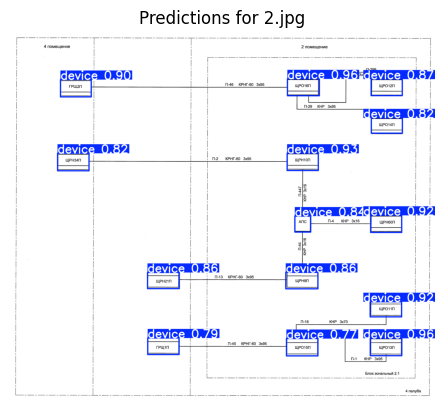


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 480x640 13 devices, 40.0ms
Speed: 3.4ms preprocess, 40.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


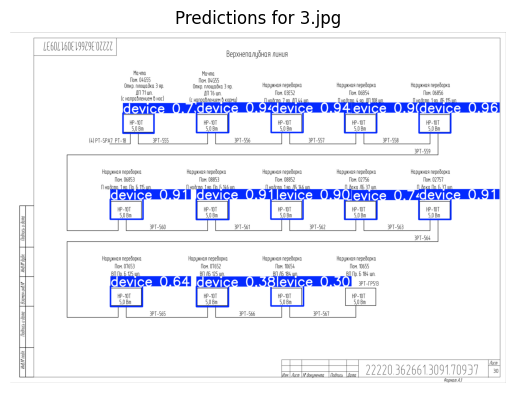

In [10]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo8n_trained_model.pt')

#Yolo8 medium

In [11]:
# Load a model
model = YOLO("yolov8m.pt")  # load a pretrained model

100%|██████████| 49.7M/49.7M [00:00<00:00, 327MB/s]


In [12]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=40, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 3.8±2.8 ms, read: 13.5±11.6 MB/s, size: 57.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      7.47G      1.818      3.237      1.171        160        640: 100%|██████████| 15/15 [00:10<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         49       1017       0.76      0.673      0.765      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      7.24G      1.049     0.8053     0.9002        175        640: 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         49       1017      0.898      0.802      0.897      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      6.73G      1.026     0.7199     0.8803        291        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49       1017      0.528      0.247      0.254       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      7.01G      1.009     0.6719     0.8854        263        640: 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         49       1017      0.363      0.343      0.232      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      7.26G       1.04     0.6588     0.8828        333        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         49       1017      0.119      0.743      0.109     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      6.67G      1.022     0.6382     0.8846        244        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         49       1017      0.826      0.879      0.905      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      7.24G      1.002      0.631     0.8859        186        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         49       1017      0.121       0.73      0.105     0.0771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      6.98G     0.9806     0.6262     0.8737        135        640: 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         49       1017      0.951      0.751       0.86      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      7.17G     0.9268     0.5635     0.8626        220        640: 100%|██████████| 15/15 [00:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         49       1017      0.973      0.834      0.941      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      6.89G     0.9218     0.5623     0.8611        290        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         49       1017      0.996      0.902      0.964      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      6.69G     0.9286     0.5804     0.8643        280        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         49       1017      0.999      0.966      0.992      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      6.95G     0.8572     0.5402     0.8541        311        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         49       1017      0.995      0.973      0.993      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      7.01G     0.8878     0.5479     0.8465        394        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         49       1017      0.902      0.561      0.642      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      6.71G     0.8454     0.5128     0.8485        229        640: 100%|██████████| 15/15 [00:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         49       1017       0.99      0.972      0.993      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      7.23G     0.8995     0.5417     0.8442        153        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         49       1017      0.994      0.971      0.991      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      6.79G     0.8851      0.515     0.8429        144        640: 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         49       1017      0.998      0.972      0.994      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      6.94G     0.8674     0.5156     0.8378         91        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         49       1017      0.998      0.977      0.993      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      6.93G     0.8337     0.4845      0.834        324        640: 100%|██████████| 15/15 [00:08<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         49       1017      0.996      0.979      0.993      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40       6.7G     0.8647     0.5006     0.8425        120        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         49       1017      0.996      0.987      0.993      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      7.65G     0.8272     0.4912     0.8313        171        640: 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49       1017      0.989      0.988      0.994      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40       6.7G     0.8057     0.4619     0.8362        201        640: 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         49       1017      0.995      0.983      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      6.67G     0.7953     0.4625     0.8391        205        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         49       1017      0.997      0.985      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      6.77G     0.7427      0.449     0.8313        148        640: 100%|██████████| 15/15 [00:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         49       1017      0.995      0.979      0.994      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40       6.8G     0.8184     0.4674      0.832        306        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         49       1017      0.999      0.973      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      6.86G      0.736     0.4398     0.8302        195        640: 100%|██████████| 15/15 [00:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         49       1017       0.99       0.98      0.993      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      6.94G     0.7652     0.4556     0.8319        209        640: 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         49       1017      0.996      0.981      0.992      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      6.87G     0.8073     0.4711     0.8323        117        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         49       1017      0.995      0.982      0.991      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      6.61G     0.7516       0.45     0.8231        287        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         49       1017      0.997      0.987      0.992      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      7.04G      0.763      0.443     0.8309        149        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49       1017      0.998      0.981      0.992      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      6.82G     0.7604     0.4293     0.8181        131        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         49       1017      0.998      0.983      0.993      0.879


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      6.74G     0.7397     0.4102     0.8123        115        640: 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         49       1017      0.995      0.982      0.994      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      6.59G     0.7525     0.4239     0.8176        100        640: 100%|██████████| 15/15 [00:07<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         49       1017      0.999      0.985      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      6.71G     0.7234     0.3992     0.8337        123        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         49       1017      0.998      0.985      0.995      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      6.72G      0.709     0.3906     0.8153        142        640: 100%|██████████| 15/15 [00:08<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         49       1017      0.997      0.972      0.994      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      6.65G     0.6878     0.3873     0.8106        146        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         49       1017      0.998      0.982      0.994      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      6.77G     0.6786     0.3693     0.8146        125        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         49       1017      0.995      0.987      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      7.03G     0.7088     0.3896     0.8174        212        640: 100%|██████████| 15/15 [00:08<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         49       1017      0.998      0.983      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      6.68G     0.6611     0.3576      0.805        185        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         49       1017      0.997      0.985      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      6.67G     0.6705     0.3586     0.7985        171        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017      0.995      0.987      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      7.01G     0.6501     0.3511     0.8101         85        640: 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         49       1017      0.997      0.987      0.995      0.898



40 epochs completed in 0.123 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


                   all         49       1017      0.997      0.987      0.995      0.898
Speed: 0.2ms preprocess, 11.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train3
CSV path: runs/detect/train3/results.csv


In [13]:
metrics = model.val()

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 25.6±13.3 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


                   all         49       1017      0.997      0.987      0.995      0.909
Speed: 17.1ms preprocess, 30.0ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train32


0.123 hours

In [14]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)

In [15]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 14 devices, 40.6ms
Speed: 4.3ms preprocess, 40.6ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)



image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 480x640 14 devices, 40.1ms
Speed: 4.0ms preprocess, 40.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


In [16]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo8m_trained_model.pt')

#Yolo8 large

In [17]:
# Load a model
model = YOLO("yolov8l.pt")  # load a pretrained model

100%|██████████| 83.7M/83.7M [00:00<00:00, 107MB/s]


In [18]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=40, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 2.8±2.1 ms, read: 16.7±11.0 MB/s, size: 57.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      10.5G      1.843      4.189      1.184        160        640: 100%|██████████| 15/15 [00:12<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         49       1017      0.341      0.683      0.302       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      10.1G      1.188      1.221     0.9343        175        640: 100%|██████████| 15/15 [00:12<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      9.81G      1.088     0.8261      0.909        291        640: 100%|██████████| 15/15 [00:12<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      10.4G      1.065     0.7297     0.8977        263        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         49       1017   0.000615    0.00885   0.000313   4.16e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      9.79G      1.048     0.7409     0.8889        333        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40       9.8G      1.048     0.6856     0.8916        244        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      10.3G      1.034     0.6839     0.8854        186        640: 100%|██████████| 15/15 [00:12<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         49       1017      0.438     0.0167     0.0282     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40        10G      1.026     0.6791      0.887        135        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         49       1017      0.808     0.0248     0.0341      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      9.74G     0.9934     0.6084     0.8748        220        640: 100%|██████████| 15/15 [00:12<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         49       1017       0.73     0.0551      0.166      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      9.51G      0.952     0.6107     0.8718        290        640: 100%|██████████| 15/15 [00:11<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         49       1017      0.947      0.736      0.796      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      9.53G     0.9617     0.6074     0.8742        280        640: 100%|██████████| 15/15 [00:12<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         49       1017   0.000952     0.0138   0.000484   0.000304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      9.97G     0.8942     0.5658     0.8647        311        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         49       1017      0.978      0.775      0.857      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      9.57G     0.9714     0.5828     0.8657        394        640: 100%|██████████| 15/15 [00:12<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         49       1017       0.95      0.967      0.984      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      9.82G     0.8773     0.5341      0.856        229        640: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         49       1017      0.997      0.975      0.988      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      10.3G     0.8988     0.5514     0.8513        153        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         49       1017      0.997      0.975       0.99      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40       9.9G     0.8168     0.4919       0.84        144        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         49       1017          1      0.975      0.993      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      10.1G     0.8321     0.4964     0.8445         91        640: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         49       1017      0.996      0.974       0.99      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      10.1G     0.8526      0.502     0.8471        324        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         49       1017      0.999      0.975      0.989      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      9.81G     0.8663     0.5109     0.8498        120        640: 100%|██████████| 15/15 [00:12<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         49       1017      0.992      0.979      0.987      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      10.3G     0.8584     0.5081     0.8451        171        640: 100%|██████████| 15/15 [00:12<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         49       1017      0.999      0.977      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      9.78G     0.8333      0.491     0.8452        201        640: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         49       1017      0.991      0.976      0.993      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      9.78G     0.8398     0.4816      0.849        205        640: 100%|██████████| 15/15 [00:11<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         49       1017      0.996      0.975      0.994      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      9.74G     0.7561     0.4522     0.8418        148        640: 100%|██████████| 15/15 [00:11<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         49       1017      0.994      0.978      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      10.1G     0.8181     0.4693     0.8397        306        640: 100%|██████████| 15/15 [00:12<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         49       1017      0.983      0.991      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40       9.7G     0.7455     0.4492      0.837        195        640: 100%|██████████| 15/15 [00:12<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         49       1017      0.992      0.976      0.994      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      9.55G     0.7816     0.4722     0.8383        209        640: 100%|██████████| 15/15 [00:11<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         49       1017      0.984      0.988      0.994      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      9.63G      0.819     0.4853     0.8416        117        640: 100%|██████████| 15/15 [00:12<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         49       1017      0.987      0.981      0.994      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      9.73G     0.7734     0.4657     0.8345        287        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         49       1017      0.991      0.978      0.994      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      9.38G     0.7637      0.444     0.8379        149        640: 100%|██████████| 15/15 [00:11<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         49       1017      0.995      0.975      0.994      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      9.93G     0.7548     0.4302     0.8237        131        640: 100%|██████████| 15/15 [00:11<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         49       1017      0.995      0.975      0.993      0.881


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      9.69G     0.7079     0.4103      0.821        115        640: 100%|██████████| 15/15 [00:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         49       1017      0.993      0.985      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      9.69G     0.7288     0.4268      0.822        100        640: 100%|██████████| 15/15 [00:12<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         49       1017      0.998      0.976      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40       9.8G      0.721     0.4021     0.8374        123        640: 100%|██████████| 15/15 [00:12<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         49       1017      0.992      0.993      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      9.79G     0.6994     0.3907     0.8264        142        640: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         49       1017      0.994      0.996      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40       9.5G     0.6857     0.3825     0.8199        146        640: 100%|██████████| 15/15 [00:11<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         49       1017      0.994      0.997      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      9.42G     0.6946     0.3785     0.8198        125        640: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         49       1017      0.993      0.995      0.995      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      10.1G      0.713     0.3989      0.824        212        640: 100%|██████████| 15/15 [00:11<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         49       1017      0.994      0.995      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      9.51G     0.6692     0.3639     0.8122        185        640: 100%|██████████| 15/15 [00:11<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         49       1017      0.995      0.989      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      9.71G     0.6733     0.3612     0.8099        171        640: 100%|██████████| 15/15 [00:12<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         49       1017      0.995      0.986      0.995      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40        10G     0.6481     0.3499     0.8192         85        640: 100%|██████████| 15/15 [00:11<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         49       1017       0.99      0.987      0.995      0.888



40 epochs completed in 0.216 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 87.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]


                   all         49       1017      0.993      0.985      0.995      0.894
Speed: 0.3ms preprocess, 18.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train4
CSV path: runs/detect/train4/results.csv


In [19]:
metrics = model.val()

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 28.4±6.8 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]


                   all         49       1017      0.993      0.985      0.995      0.903
Speed: 12.4ms preprocess, 46.3ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train42


0.216 hours

In [20]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 13 devices, 62.8ms
Speed: 4.1ms preprocess, 62.8ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)


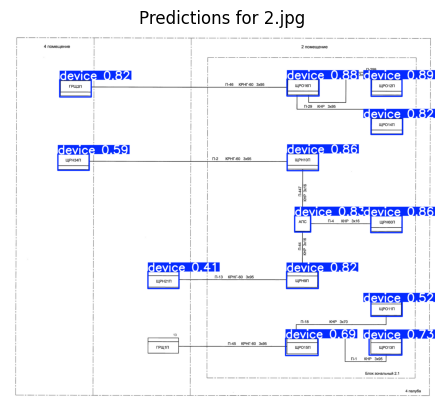


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 480x640 10 devices, 54.9ms
Speed: 3.6ms preprocess, 54.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


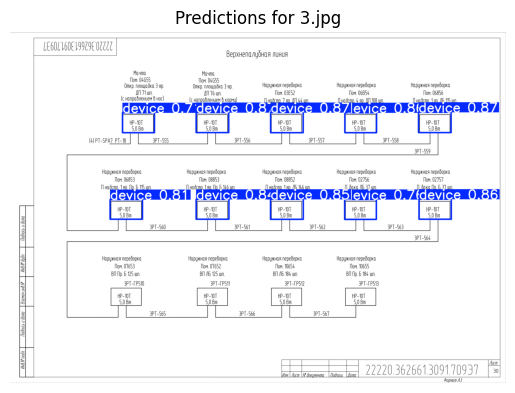

In [21]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [22]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo8l_trained_model.pt')

#Yolo10 nano

In [23]:
# Load a model
model = YOLO("yolov10n.pt")  # load a pretrained model

100%|██████████| 5.59M/5.59M [00:00<00:00, 116MB/s]


Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.8±0.2 ms, read: 21.6±10.9 MB/s, size: 57.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      5.23G      4.406       7.32      2.482        160        640: 100%|██████████| 15/15 [00:06<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      5.23G      3.072      4.595      1.909        175        640: 100%|██████████| 15/15 [00:06<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      5.23G      2.964      3.216      1.867        291        640: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      5.23G      2.834      2.797      1.852        263        640: 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         49       1017    0.00524     0.0757    0.00857    0.00682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      5.23G      2.842      2.679      1.855        333        640: 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         49       1017      0.018      0.261      0.107     0.0727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      5.23G      2.686      2.482      1.805        244        640: 100%|██████████| 15/15 [00:05<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         49       1017     0.0405      0.585      0.233      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      5.23G      2.591      2.372      1.816        186        640: 100%|██████████| 15/15 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         49       1017      0.709      0.616      0.705      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      5.23G      2.617      2.271      1.804        135        640: 100%|██████████| 15/15 [00:05<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         49       1017      0.877      0.403      0.771      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      5.23G       2.61      2.125      1.786        220        640: 100%|██████████| 15/15 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         49       1017      0.874      0.738      0.877      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      5.23G      2.486      1.998      1.784        290        640: 100%|██████████| 15/15 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         49       1017      0.863      0.842      0.929      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      5.23G      2.547      1.994      1.785        280        640: 100%|██████████| 15/15 [00:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         49       1017      0.799      0.854       0.89      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      5.23G      2.349      1.886      1.757        311        640: 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         49       1017      0.837      0.886      0.935      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      5.24G      2.372      1.849      1.736        394        640: 100%|██████████| 15/15 [00:05<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         49       1017      0.852      0.887      0.942      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      5.26G      2.336      1.758      1.734        229        640: 100%|██████████| 15/15 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         49       1017      0.885      0.884      0.956       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      5.26G      2.489      1.859      1.744        153        640: 100%|██████████| 15/15 [00:05<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         49       1017      0.897      0.888      0.955      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      5.26G      2.211      1.631      1.714        144        640: 100%|██████████| 15/15 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         49       1017      0.907      0.898       0.96      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      5.26G      2.251      1.724      1.721         91        640: 100%|██████████| 15/15 [00:06<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         49       1017      0.892      0.847      0.946      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      5.26G      2.264      1.602      1.717        324        640: 100%|██████████| 15/15 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         49       1017      0.911      0.928       0.97      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      5.26G      2.294      1.612      1.723        120        640: 100%|██████████| 15/15 [00:06<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         49       1017      0.908      0.934       0.97        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      5.26G      2.235      1.556      1.709        171        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         49       1017      0.938       0.91      0.976      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      5.26G      2.167      1.519      1.718        201        640: 100%|██████████| 15/15 [00:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         49       1017      0.948       0.91      0.974      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      5.26G       2.23       1.57      1.726        205        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         49       1017      0.934      0.926      0.966      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      5.26G      2.073      1.491      1.703        148        640: 100%|██████████| 15/15 [00:05<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         49       1017      0.952      0.911      0.974       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      5.26G      2.161      1.511      1.707        306        640: 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         49       1017      0.928      0.914      0.973      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      5.26G      2.045      1.431      1.702        195        640: 100%|██████████| 15/15 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         49       1017      0.927      0.922      0.977      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      5.26G       2.08      1.417      1.689        209        640: 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         49       1017      0.947      0.935      0.982      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      5.26G      2.107      1.433        1.7        117        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         49       1017      0.945      0.938       0.98      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      5.26G      2.052       1.41      1.686        287        640: 100%|██████████| 15/15 [00:05<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         49       1017      0.954      0.928      0.982      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      5.26G      2.122      1.413        1.7        149        640: 100%|██████████| 15/15 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         49       1017      0.939       0.93      0.979       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      5.26G      2.054      1.366      1.677        131        640: 100%|██████████| 15/15 [00:06<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         49       1017      0.951       0.93      0.982      0.847


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      5.26G      1.921      1.339      1.662        115        640: 100%|██████████| 15/15 [00:06<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         49       1017      0.924      0.928      0.977       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      5.26G      1.969      1.372      1.674        100        640: 100%|██████████| 15/15 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         49       1017      0.952       0.94      0.982      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      5.26G      1.922      1.274      1.692        123        640: 100%|██████████| 15/15 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         49       1017      0.957      0.941      0.985      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      5.26G      1.871      1.255      1.664        142        640: 100%|██████████| 15/15 [00:05<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         49       1017      0.975      0.919      0.985      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      5.26G      1.855       1.25      1.654        146        640: 100%|██████████| 15/15 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         49       1017      0.951      0.941      0.986      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      5.26G      1.847      1.221      1.665        125        640: 100%|██████████| 15/15 [00:05<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         49       1017      0.951      0.936      0.982      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      5.26G      1.954      1.279      1.663        212        640: 100%|██████████| 15/15 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         49       1017      0.954      0.948      0.984      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      5.26G      1.845      1.208      1.653        185        640: 100%|██████████| 15/15 [00:05<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         49       1017      0.953      0.943      0.986      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      5.26G      1.832      1.194       1.64        171        640: 100%|██████████| 15/15 [00:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         49       1017      0.949      0.947      0.985      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      5.26G      1.747      1.154       1.65         85        640: 100%|██████████| 15/15 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         49       1017      0.935      0.953      0.984      0.857



40 epochs completed in 0.087 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 5.7MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 125 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]


                   all         49       1017      0.934      0.953      0.984      0.857
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train5
CSV path: runs/detect/train5/results.csv


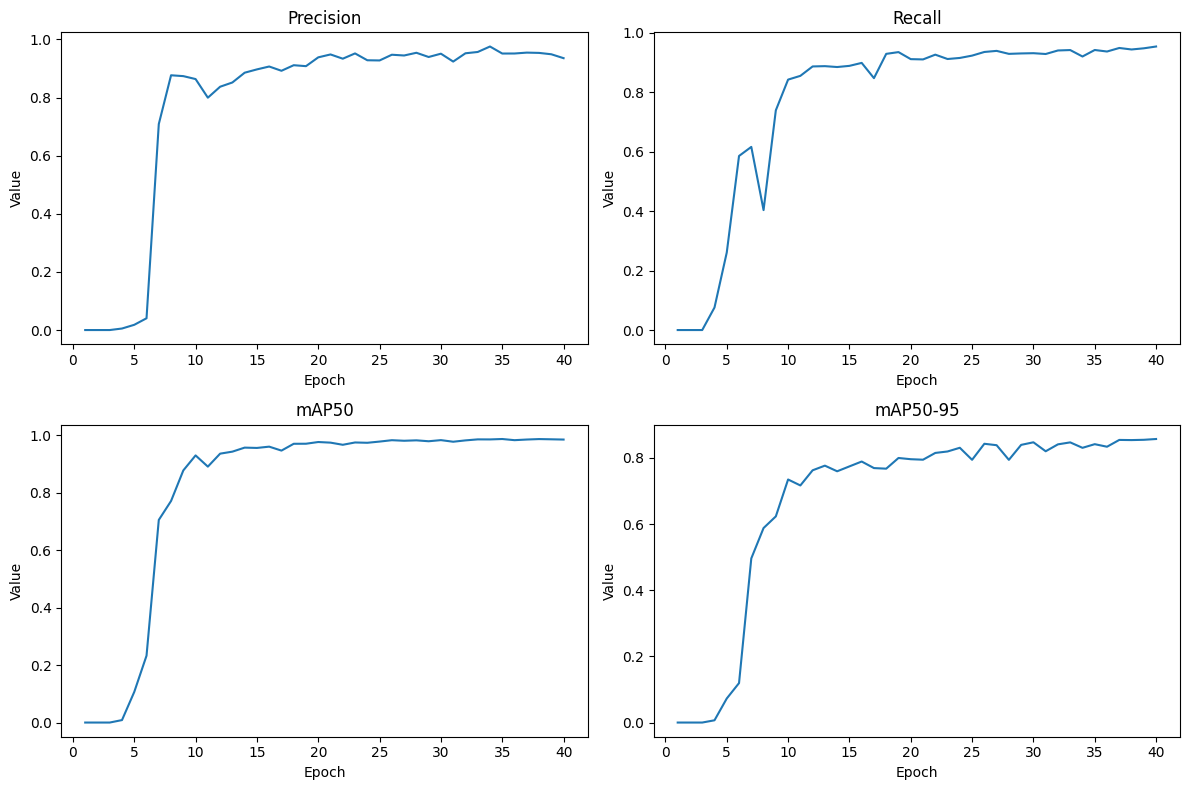

In [24]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=40, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [25]:
metrics = model.val()

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 125 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 33.0±8.6 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


                   all         49       1017      0.934      0.952      0.984      0.854
Speed: 8.4ms preprocess, 11.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train52


0.087 hours

In [26]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 16 devices, 18.7ms
Speed: 5.4ms preprocess, 18.7ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 640)


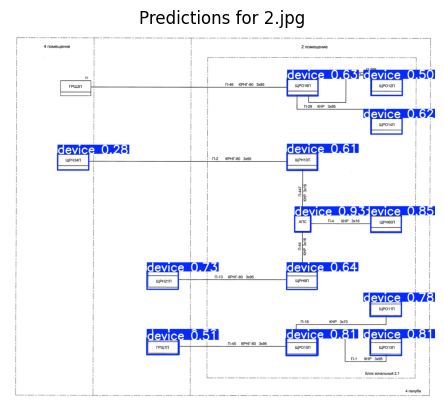


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 480x640 13 devices, 17.9ms
Speed: 3.5ms preprocess, 17.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


In [27]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [28]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo10n_trained_model.pt')

#Yolo10 medium

In [29]:
# Load a model
model = YOLO("yolov10m.pt")  # load a pretrained model

100%|██████████| 32.1M/32.1M [00:00<00:00, 113MB/s]


Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±1.0 ms, read: 19.5±13.7 MB/s, size: 57.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      9.63G      3.616      6.693      2.211        160        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         49       1017      0.948      0.924      0.964      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      9.26G       2.52      2.122      1.804        175        640: 100%|██████████| 15/15 [00:10<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         49       1017      0.287      0.389      0.174      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      8.98G      2.449      1.764      1.785        291        640: 100%|██████████| 15/15 [00:09<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         49       1017      0.389      0.057     0.0646     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      9.06G      2.554       1.64      1.806        263        640: 100%|██████████| 15/15 [00:09<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      9.29G      2.528      1.585      1.785        333        640: 100%|██████████| 15/15 [00:09<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      8.56G      2.392      1.473      1.774        244        640: 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         49       1017      0.726      0.419      0.505      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      9.16G      2.336      1.406      1.785        186        640: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49       1017      0.369      0.057     0.0803     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      9.22G      2.447       1.44      1.775        135        640: 100%|██████████| 15/15 [00:09<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017      0.782      0.403      0.523      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      9.14G      2.297      1.292      1.763        220        640: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         49       1017      0.956      0.853      0.917       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      9.02G      2.263      1.298      1.767        290        640: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1017      0.524      0.264      0.281      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      8.84G      2.232      1.305      1.762        280        640: 100%|██████████| 15/15 [00:09<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1017      0.957      0.949      0.979        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      8.95G       2.14      1.235      1.747        311        640: 100%|██████████| 15/15 [00:09<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         49       1017       0.99      0.964      0.988      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      8.95G      2.175      1.267      1.727        394        640: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         49       1017      0.968      0.957      0.984      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      8.81G      2.066      1.146      1.714        229        640: 100%|██████████| 15/15 [00:09<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         49       1017      0.981      0.966      0.985      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      9.17G      2.178       1.24      1.711        153        640: 100%|██████████| 15/15 [00:09<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         49       1017      0.985      0.938      0.984      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      8.93G      1.916      1.049      1.685        144        640: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         49       1017      0.986      0.967      0.986      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      8.82G      1.976      1.073      1.686         91        640: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         49       1017      0.992      0.963      0.987      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      9.02G      1.983      1.051      1.685        324        640: 100%|██████████| 15/15 [00:09<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         49       1017      0.971       0.96      0.988      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      8.83G      2.025      1.073      1.695        120        640: 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         49       1017       0.98      0.948      0.989       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      9.52G      1.961      1.029      1.678        171        640: 100%|██████████| 15/15 [00:10<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1017      0.969      0.957      0.988      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40       8.7G      1.909      1.016      1.687        201        640: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49       1017      0.984      0.955      0.988      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      8.76G      1.885      1.005      1.686        205        640: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         49       1017      0.993      0.975      0.993      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      8.81G      1.805      0.961      1.683        148        640: 100%|██████████| 15/15 [00:09<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         49       1017      0.987      0.911      0.975      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      8.71G      1.909      1.027      1.678        306        640: 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         49       1017      0.983      0.956      0.983      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      8.83G      1.758     0.9745      1.673        195        640: 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         49       1017      0.954      0.941      0.977      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      9.07G      1.759     0.9557      1.663        209        640: 100%|██████████| 15/15 [00:09<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017      0.992      0.961      0.993      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      9.06G      1.843     0.9861      1.676        117        640: 100%|██████████| 15/15 [00:09<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49       1017       0.99      0.976      0.994      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40       8.7G      1.783     0.9599      1.653        287        640: 100%|██████████| 15/15 [00:10<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017      0.987      0.963      0.991      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      9.01G      1.799     0.9365      1.664        149        640: 100%|██████████| 15/15 [00:09<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1017      0.978      0.973      0.989       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      8.75G      1.774     0.8977      1.644        131        640: 100%|██████████| 15/15 [00:09<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49       1017      0.994      0.975      0.993       0.88


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      8.65G      1.633     0.8377       1.63        115        640: 100%|██████████| 15/15 [00:10<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         49       1017      0.989      0.979      0.993      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      8.69G      1.665     0.8661      1.632        100        640: 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         49       1017      0.989      0.972      0.993      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      8.76G      1.665     0.8146      1.663        123        640: 100%|██████████| 15/15 [00:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         49       1017      0.988      0.962      0.993      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      8.64G      1.633     0.7874      1.634        142        640: 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         49       1017      0.975      0.964      0.991      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      8.78G      1.583     0.7897      1.623        146        640: 100%|██████████| 15/15 [00:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         49       1017      0.989      0.959      0.993      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      8.84G      1.556     0.7501      1.636        125        640: 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         49       1017      0.985      0.973      0.993      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      8.93G      1.649     0.8268      1.634        212        640: 100%|██████████| 15/15 [00:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         49       1017      0.986      0.962      0.992      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      8.82G      1.547       0.74      1.617        185        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         49       1017      0.986      0.971      0.993      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      8.69G      1.578     0.7403      1.609        171        640: 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         49       1017      0.983      0.979      0.994      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      9.04G      1.514      0.729      1.624         85        640: 100%|██████████| 15/15 [00:09<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         49       1017      0.995      0.974      0.994      0.904



40 epochs completed in 0.167 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 33.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10m summary (fused): 159 layers, 16,451,542 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]


                   all         49       1017      0.996      0.974      0.994      0.904
Speed: 0.8ms preprocess, 13.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train6
CSV path: runs/detect/train6/results.csv


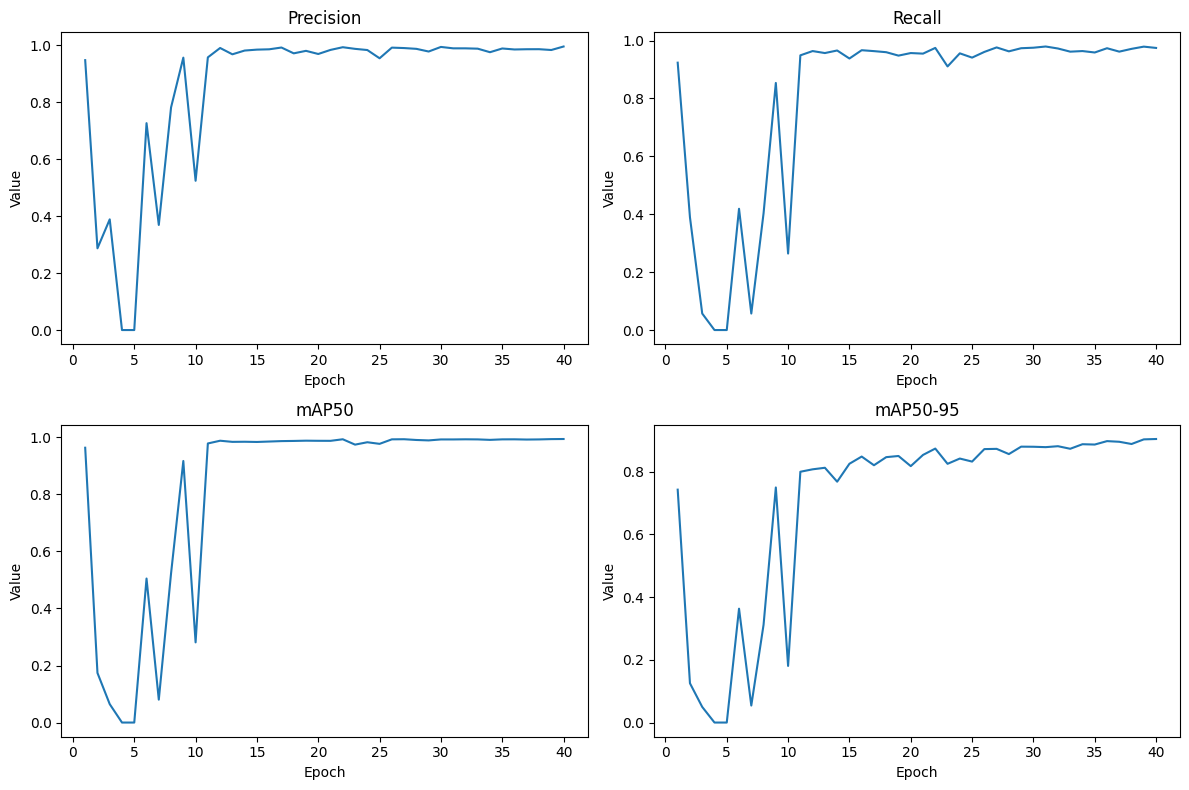

In [30]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=40, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [31]:
metrics = model.val()

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10m summary (fused): 159 layers, 16,451,542 parameters, 0 gradients, 63.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 34.2±6.2 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


                   all         49       1017      0.995      0.974      0.994      0.907
Speed: 5.2ms preprocess, 28.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train62


0.167 hours

In [32]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 10 devices, 34.3ms
Speed: 6.6ms preprocess, 34.3ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 640)


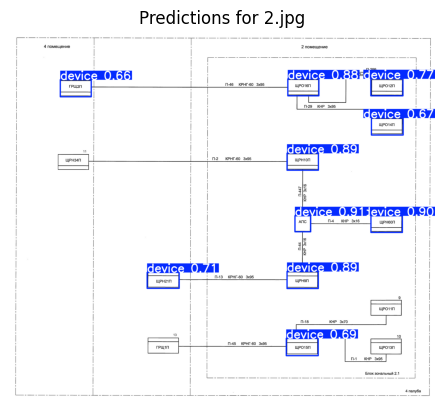


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 480x640 13 devices, 28.0ms
Speed: 3.8ms preprocess, 28.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


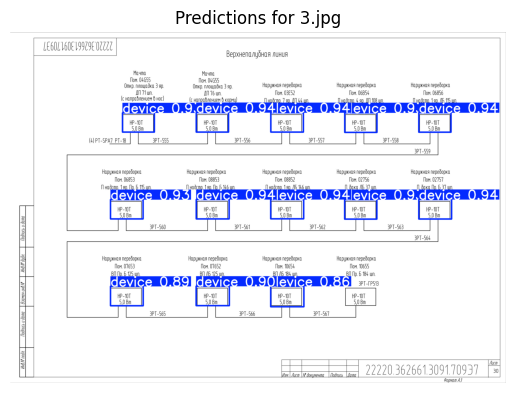

In [33]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [34]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo10m_trained_model.pt')

#Yolo 10 Large

In [35]:
# Load a model
model = YOLO("yolov10l.pt")  # load a pretrained model

100%|██████████| 50.0M/50.0M [00:00<00:00, 116MB/s]


Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10l.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.1±0.2 ms, read: 26.0±15.9 MB/s, size: 57.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.0005), 179 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      13.9G      3.985      7.956      2.353        160        640: 100%|██████████| 15/15 [00:14<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         49       1017      0.768      0.747      0.811      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      14.4G      2.597      2.393      1.822        175        640: 100%|██████████| 15/15 [00:14<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      13.3G      2.574       1.84      1.818        291        640: 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      14.2G      2.513      1.656      1.812        263        640: 100%|██████████| 15/15 [00:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      13.3G      2.575      1.592      1.816        333        640: 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      14.1G       2.39      1.441      1.788        244        640: 100%|██████████| 15/15 [00:13<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         49       1017     0.0034     0.0147    0.00169    0.00134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      13.7G      2.373      1.353      1.802        186        640: 100%|██████████| 15/15 [00:13<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      14.1G      2.582      1.485      1.795        135        640: 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         49       1017      0.845      0.557      0.631      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      13.2G      2.223      1.211      1.756        220        640: 100%|██████████| 15/15 [00:13<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         49       1017      0.848      0.524       0.67      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      14.1G      2.184      1.259      1.757        290        640: 100%|██████████| 15/15 [00:13<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         49       1017      0.929       0.89      0.959      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      13.1G      2.251      1.349      1.763        280        640: 100%|██████████| 15/15 [00:13<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         49       1017      0.959      0.936      0.975      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      14.2G       2.13      1.208      1.743        311        640: 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         49       1017      0.964      0.955       0.98      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40        14G       2.13      1.252      1.728        394        640: 100%|██████████| 15/15 [00:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         49       1017      0.971      0.973      0.991      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      13.2G      2.011      1.146      1.724        229        640: 100%|██████████| 15/15 [00:13<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         49       1017       0.98       0.95      0.987      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      14.4G      2.133      1.239       1.71        153        640: 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         49       1017      0.985      0.926      0.984      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      13.3G      1.927      1.082      1.693        144        640: 100%|██████████| 15/15 [00:13<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         49       1017      0.979      0.967      0.988      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      14.1G      1.992       1.09      1.696         91        640: 100%|██████████| 15/15 [00:14<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         49       1017       0.98      0.962      0.979      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      13.1G      2.016      1.041      1.696        324        640: 100%|██████████| 15/15 [00:14<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         49       1017      0.909      0.826      0.925       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      14.1G      1.998      1.054      1.706        120        640: 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         49       1017      0.978       0.97      0.992       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      13.6G       1.93      1.004      1.685        171        640: 100%|██████████| 15/15 [00:14<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         49       1017      0.986      0.956      0.989      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      14.2G      1.902     0.9961      1.693        201        640: 100%|██████████| 15/15 [00:13<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         49       1017      0.984       0.96      0.986       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      13.1G      1.891     0.9928      1.693        205        640: 100%|██████████| 15/15 [00:13<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         49       1017      0.984       0.96      0.988      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      14.1G      1.731     0.9136      1.684        148        640: 100%|██████████| 15/15 [00:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         49       1017      0.995      0.952      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      13.1G      1.929      1.015      1.688        306        640: 100%|██████████| 15/15 [00:13<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         49       1017      0.989      0.947      0.987      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      14.3G      1.705     0.9203      1.673        195        640: 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         49       1017      0.992      0.963      0.987      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      12.9G      1.786     0.9543      1.672        209        640: 100%|██████████| 15/15 [00:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         49       1017      0.984      0.967      0.989       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40        13G      1.863     0.9513      1.682        117        640: 100%|██████████| 15/15 [00:13<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         49       1017      0.994      0.977      0.993      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40        13G      1.771     0.9225      1.656        287        640: 100%|██████████| 15/15 [00:13<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         49       1017      0.993       0.97      0.992      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      12.8G      1.809     0.9235      1.674        149        640: 100%|██████████| 15/15 [00:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         49       1017      0.992      0.979      0.994      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      13.3G      1.781     0.8854      1.647        131        640: 100%|██████████| 15/15 [00:13<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         49       1017      0.989      0.982      0.994      0.888


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40        14G      1.633     0.8183      1.642        115        640: 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         49       1017      0.987      0.972      0.994      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      12.7G      1.676      0.855      1.648        100        640: 100%|██████████| 15/15 [00:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         49       1017      0.994      0.975      0.994      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      13.3G      1.643     0.7969      1.679        123        640: 100%|██████████| 15/15 [00:13<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         49       1017      0.987      0.976      0.994      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40        14G      1.597     0.7777      1.645        142        640: 100%|██████████| 15/15 [00:13<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         49       1017      0.984      0.976      0.994      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      12.8G      1.588     0.7664      1.639        146        640: 100%|██████████| 15/15 [00:13<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         49       1017      0.984      0.969       0.99      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      12.7G      1.593      0.762      1.651        125        640: 100%|██████████| 15/15 [00:13<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         49       1017      0.996      0.971      0.993       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      13.2G      1.671     0.8118       1.65        212        640: 100%|██████████| 15/15 [00:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         49       1017      0.993      0.977      0.994      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      14.1G      1.537     0.7252      1.628        185        640: 100%|██████████| 15/15 [00:13<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         49       1017      0.987      0.976      0.994        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      13.1G      1.524     0.7175      1.617        171        640: 100%|██████████| 15/15 [00:13<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         49       1017      0.997      0.975      0.994        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      14.2G      1.479     0.7061      1.631         85        640: 100%|██████████| 15/15 [00:13<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         49       1017      0.996       0.97      0.993      0.898



40 epochs completed in 0.252 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 52.2MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 52.2MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10l summary (fused): 197 layers, 25,717,910 parameters, 0 gradients, 126.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


                   all         49       1017      0.997      0.975      0.994        0.9
Speed: 0.3ms preprocess, 20.5ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train7
CSV path: runs/detect/train7/results.csv


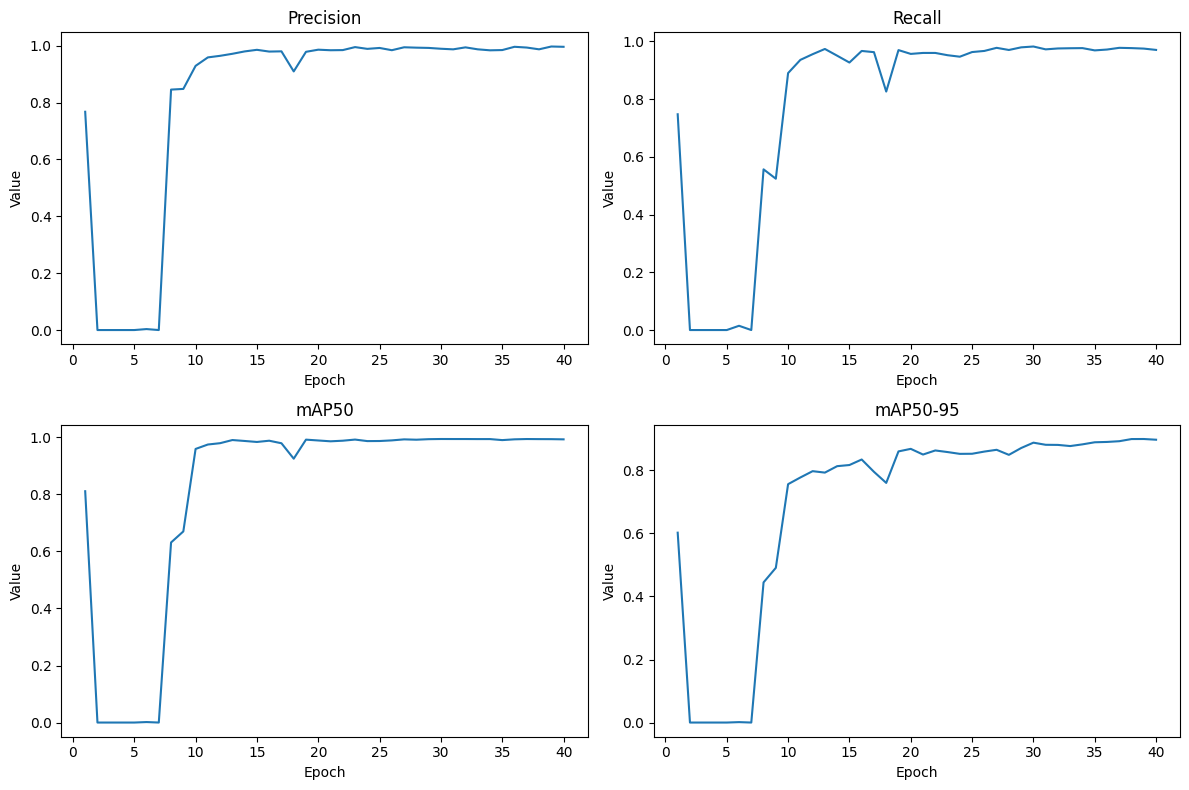

In [36]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=40, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [37]:
metrics = model.val()

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10l summary (fused): 197 layers, 25,717,910 parameters, 0 gradients, 126.3 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 25.8±8.2 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]


                   all         49       1017      0.997      0.975      0.994        0.9
Speed: 10.8ms preprocess, 41.9ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train72


In [38]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 14 devices, 54.4ms
Speed: 5.9ms preprocess, 54.4ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 640)


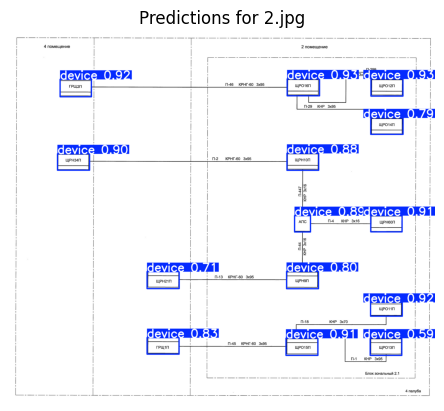


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 480x640 15 devices, 45.6ms
Speed: 3.8ms preprocess, 45.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


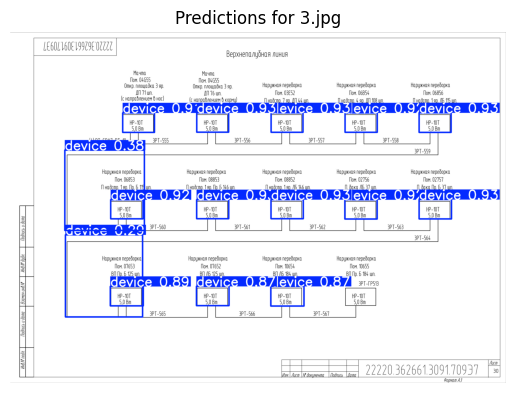

In [39]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [40]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo10l_trained_model.pt')

#Yolo 11 nano

In [41]:
# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 2.3±1.1 ms, read: 22.9±9.6 MB/s, size: 57.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train8
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40       4.7G      2.066      3.497      1.259        160        640: 100%|██████████| 15/15 [00:06<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         49       1017     0.0472      0.682     0.0572     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40       4.7G      1.441      2.192     0.9543        175        640: 100%|██████████| 15/15 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         49       1017     0.0573      0.829     0.0794     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40       4.7G      1.337      1.328     0.9281        291        640: 100%|██████████| 15/15 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         49       1017     0.0544      0.786      0.452      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40       4.7G      1.275      1.085      0.927        263        640: 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         49       1017          1      0.277      0.791      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40       4.7G      1.256      1.032     0.9199        333        640: 100%|██████████| 15/15 [00:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]


                   all         49       1017      0.992      0.463      0.889      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40       4.7G      1.177     0.9654     0.8949        244        640: 100%|██████████| 15/15 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         49       1017      0.933       0.79      0.932      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40       4.7G      1.161     0.9201     0.8941        186        640: 100%|██████████| 15/15 [00:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         49       1017      0.914      0.912      0.959      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40       4.7G      1.154      0.897     0.8925        135        640: 100%|██████████| 15/15 [00:04<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         49       1017      0.929      0.952      0.967      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40       4.7G      1.066     0.8024     0.8784        220        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         49       1017      0.969      0.951      0.983      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40       4.7G      1.074     0.7925       0.88        290        640: 100%|██████████| 15/15 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         49       1017      0.774      0.616      0.735      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40       4.7G      1.071     0.7933      0.874        280        640: 100%|██████████| 15/15 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         49       1017      0.677      0.663      0.714      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40       4.7G     0.9904     0.7586     0.8695        311        640: 100%|██████████| 15/15 [00:05<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         49       1017      0.977      0.957      0.985      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40       4.7G      1.052     0.7689     0.8666        394        640: 100%|██████████| 15/15 [00:04<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49       1017      0.979      0.957      0.985       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40       4.7G     0.9958     0.7193     0.8583        229        640: 100%|██████████| 15/15 [00:05<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         49       1017      0.992       0.97      0.992      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40       4.7G      1.018     0.7492      0.861        153        640: 100%|██████████| 15/15 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         49       1017      0.978      0.963      0.983       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40       4.7G     0.9426     0.6755     0.8485        144        640: 100%|██████████| 15/15 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         49       1017      0.988      0.966      0.986      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40       4.7G     0.9601     0.7279     0.8531         91        640: 100%|██████████| 15/15 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49       1017      0.989      0.968      0.989      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40       4.7G     0.9715     0.6953     0.8552        324        640: 100%|██████████| 15/15 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         49       1017      0.993      0.961       0.99      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40       4.7G      1.004     0.6955     0.8535        120        640: 100%|██████████| 15/15 [00:05<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49       1017      0.988      0.962      0.992      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40       4.7G     0.9914     0.6946     0.8465        171        640: 100%|██████████| 15/15 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         49       1017      0.989      0.971      0.992      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40       4.7G     0.9494     0.6658     0.8487        201        640: 100%|██████████| 15/15 [00:05<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49       1017      0.993      0.971       0.99      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40       4.7G     0.9479     0.6728     0.8509        205        640: 100%|██████████| 15/15 [00:04<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         49       1017      0.987      0.966      0.991      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40       4.7G      0.887      0.636     0.8408        148        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         49       1017      0.993      0.966      0.987      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40       4.7G     0.9376     0.6493     0.8429        306        640: 100%|██████████| 15/15 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49       1017      0.994      0.965      0.988      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40       4.7G       0.88     0.6295     0.8443        195        640: 100%|██████████| 15/15 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         49       1017      0.994      0.969      0.991      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40       4.7G     0.9008     0.6309     0.8432        209        640: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         49       1017      0.987       0.97      0.984      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40       4.7G     0.9105     0.6148     0.8483        117        640: 100%|██████████| 15/15 [00:04<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         49       1017      0.989      0.978      0.994      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40       4.7G     0.8675     0.6108     0.8404        287        640: 100%|██████████| 15/15 [00:05<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         49       1017      0.994      0.969      0.992      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40       4.7G     0.9033     0.6178     0.8428        149        640: 100%|██████████| 15/15 [00:04<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         49       1017      0.992      0.969      0.992      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40       4.7G     0.8815      0.597      0.833        131        640: 100%|██████████| 15/15 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         49       1017      0.994       0.97      0.994      0.842


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40       4.7G     0.7898     0.5721     0.8199        115        640: 100%|██████████| 15/15 [00:06<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         49       1017      0.992      0.967      0.988      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40       4.7G     0.8292     0.5855      0.829        100        640: 100%|██████████| 15/15 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         49       1017       0.98      0.957      0.984      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40       4.7G     0.8123     0.5558     0.8346        123        640: 100%|██████████| 15/15 [00:04<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         49       1017      0.994       0.97      0.988      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40       4.7G     0.8155     0.5629     0.8264        142        640: 100%|██████████| 15/15 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         49       1017      0.996      0.971      0.993      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40       4.7G     0.8043      0.549     0.8217        146        640: 100%|██████████| 15/15 [00:05<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         49       1017      0.998      0.973      0.993      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40       4.7G     0.7829     0.5238     0.8228        125        640: 100%|██████████| 15/15 [00:04<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         49       1017      0.996      0.973      0.993      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40       4.7G     0.8271     0.5545     0.8252        212        640: 100%|██████████| 15/15 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         49       1017      0.996      0.974      0.993      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40       4.7G     0.7647     0.5189     0.8212        185        640: 100%|██████████| 15/15 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         49       1017      0.999      0.972      0.993       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40       4.7G     0.7869     0.5354     0.8159        171        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         49       1017      0.996      0.976      0.993      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40       4.7G     0.7461      0.506     0.8181         85        640: 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         49       1017      0.999      0.972      0.993      0.847



40 epochs completed in 0.070 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 5.5MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]


                   all         49       1017      0.996      0.976      0.993       0.85
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train8
CSV path: runs/detect/train8/results.csv


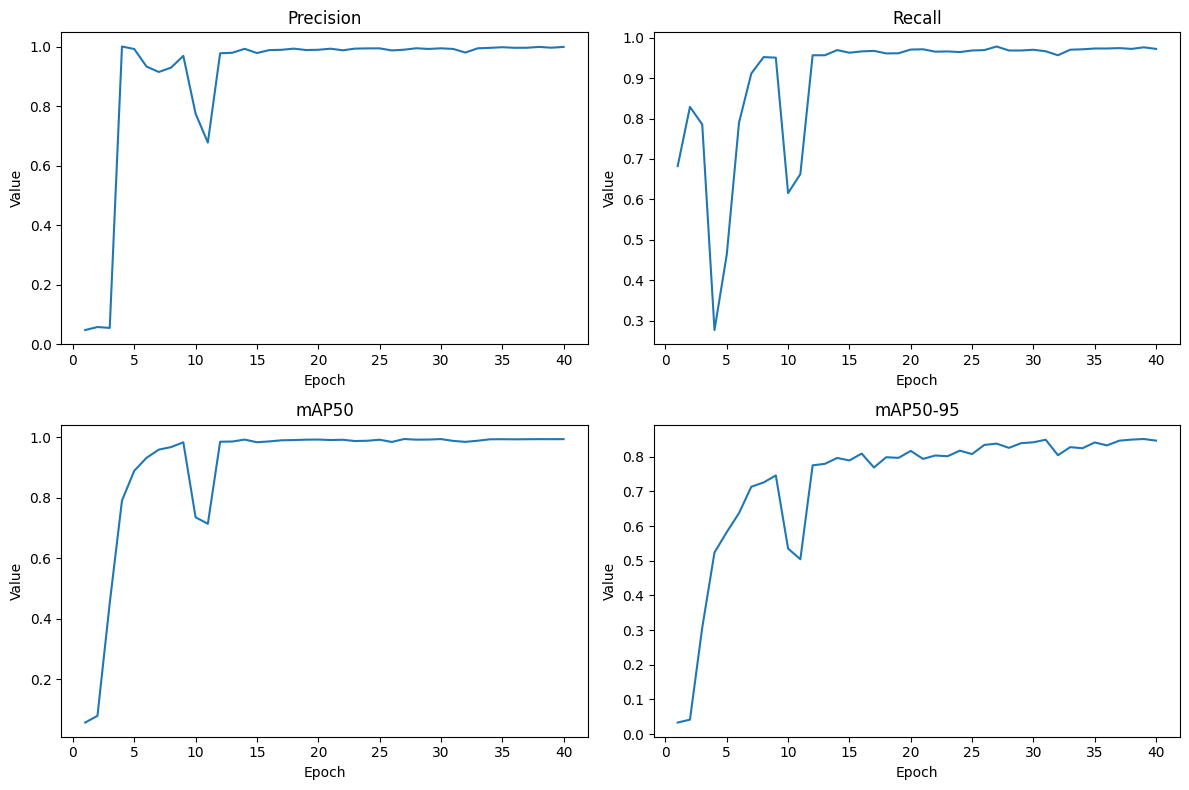

In [42]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=40, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [43]:
metrics = model.val()

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 25.5±7.6 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]


                   all         49       1017      0.996      0.976      0.993      0.859
Speed: 9.5ms preprocess, 7.8ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/train82


In [44]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 13 devices, 24.6ms
Speed: 4.3ms preprocess, 24.6ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)


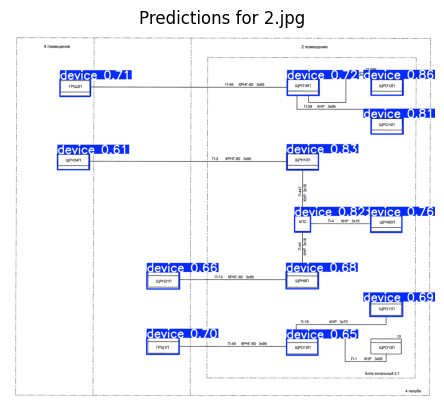


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 480x640 11 devices, 25.1ms
Speed: 3.4ms preprocess, 25.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


In [45]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [46]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo11n_trained_model.pt')

# Yolo 11 Medium

In [47]:
# Load a model
model = YOLO("yolo11m.pt")  # load a pretrained model

100%|██████████| 38.8M/38.8M [00:00<00:00, 106MB/s] 


Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.6±0.4 ms, read: 20.8±8.9 MB/s, size: 57.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train9
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      9.25G      1.875      3.374      1.184        160        640: 100%|██████████| 15/15 [00:09<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         49       1017      0.946      0.875      0.939      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40       8.3G      1.121     0.8908     0.9409        175        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49       1017      0.095      0.402     0.0699     0.0488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      8.46G      1.088     0.8002     0.9147        291        640: 100%|██████████| 15/15 [00:09<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1017     0.0666      0.648     0.0554     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40       8.3G      1.035     0.7302     0.9041        263        640: 100%|██████████| 15/15 [00:09<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         49       1017     0.0732      0.664     0.0685     0.0476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      8.34G      1.058     0.7055     0.9011        333        640: 100%|██████████| 15/15 [00:09<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40       8.4G      1.066     0.7202     0.9125        244        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      8.95G       1.06     0.7311     0.9093        186        640: 100%|██████████| 15/15 [00:08<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         49       1017      0.226      0.428      0.135     0.0968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      8.71G      1.052     0.6804     0.8992        135        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         49       1017      0.884      0.801      0.843       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      8.61G      0.957     0.6185     0.8893        220        640: 100%|██████████| 15/15 [00:08<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         49       1017      0.873      0.961      0.917      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      8.08G     0.9569     0.5998     0.8787        290        640: 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         49       1017      0.973      0.945      0.976      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      8.38G     0.9756     0.6216     0.8812        280        640: 100%|██████████| 15/15 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1017      0.955      0.842      0.942      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      8.37G     0.9135     0.5762     0.8743        311        640: 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         49       1017      0.835      0.446       0.61      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      8.19G      0.953     0.5963     0.8717        394        640: 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         49       1017      0.948      0.796      0.943      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      8.58G     0.8756     0.5436     0.8579        229        640: 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         49       1017      0.988      0.977      0.994      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      8.65G     0.9526     0.5838       0.86        153        640: 100%|██████████| 15/15 [00:09<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         49       1017      0.999      0.968      0.988      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      8.45G     0.9249     0.5683     0.8585        144        640: 100%|██████████| 15/15 [00:08<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         49       1017      0.969      0.913      0.971      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40       8.4G     0.9054     0.5629     0.8579         91        640: 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         49       1017       0.99      0.986      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      8.48G     0.8534     0.5397     0.8514        324        640: 100%|██████████| 15/15 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         49       1017      0.995      0.975      0.994      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      8.41G     0.8778      0.535     0.8562        120        640: 100%|██████████| 15/15 [00:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         49       1017      0.996      0.979      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      8.42G      0.873     0.5254     0.8489        171        640: 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1017      0.996      0.987      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      8.48G     0.8485     0.5053     0.8508        201        640: 100%|██████████| 15/15 [00:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         49       1017      0.994      0.986      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      8.55G     0.8334     0.4871     0.8528        205        640: 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         49       1017      0.993      0.977      0.994      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      8.38G     0.7882     0.4705     0.8507        148        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         49       1017      0.998      0.974      0.992      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      8.37G     0.8446     0.5006     0.8466        306        640: 100%|██████████| 15/15 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         49       1017      0.974      0.888      0.973      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      8.58G      0.769     0.4769     0.8429        195        640: 100%|██████████| 15/15 [00:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         49       1017      0.974      0.735      0.833        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      8.17G     0.7701     0.4696     0.8371        209        640: 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         49       1017      0.999      0.975      0.993      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40       8.3G     0.8098       0.48     0.8414        117        640: 100%|██████████| 15/15 [00:08<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1017      0.992      0.982      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      8.49G     0.7563     0.4634     0.8326        287        640: 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         49       1017          1      0.976      0.993      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      8.26G       0.77     0.4536     0.8397        149        640: 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         49       1017      0.999      0.975      0.994      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      8.55G     0.7577     0.4349     0.8251        131        640: 100%|██████████| 15/15 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017      0.995      0.981      0.995      0.879


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      8.29G     0.7226     0.4342     0.8212        115        640: 100%|██████████| 15/15 [00:09<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         49       1017      0.998      0.974      0.991      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40       8.2G     0.7526     0.4551     0.8288        100        640: 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         49       1017      0.996      0.982      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40       8.2G     0.7372     0.4249     0.8418        123        640: 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         49       1017      0.998      0.994      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      8.29G      0.726     0.4161     0.8284        142        640: 100%|██████████| 15/15 [00:08<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017      0.992      0.984      0.995      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      8.11G     0.7129     0.4125     0.8244        146        640: 100%|██████████| 15/15 [00:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         49       1017      0.999      0.976      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      8.18G     0.6946     0.3942     0.8263        125        640: 100%|██████████| 15/15 [00:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         49       1017      0.996      0.978      0.995      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      8.45G     0.7216     0.4144      0.825        212        640: 100%|██████████| 15/15 [00:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         49       1017      0.998      0.976      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      8.38G     0.6698     0.3828     0.8144        185        640: 100%|██████████| 15/15 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017       0.99      0.982      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      8.34G     0.6832     0.3844     0.8104        171        640: 100%|██████████| 15/15 [00:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         49       1017      0.997      0.973      0.994      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      8.37G      0.662      0.374     0.8209         85        640: 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         49       1017      0.998      0.974      0.993      0.889



40 epochs completed in 0.168 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 40.5MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]


                   all         49       1017      0.998      0.974      0.993      0.889
Speed: 0.2ms preprocess, 13.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train9
CSV path: runs/detect/train9/results.csv


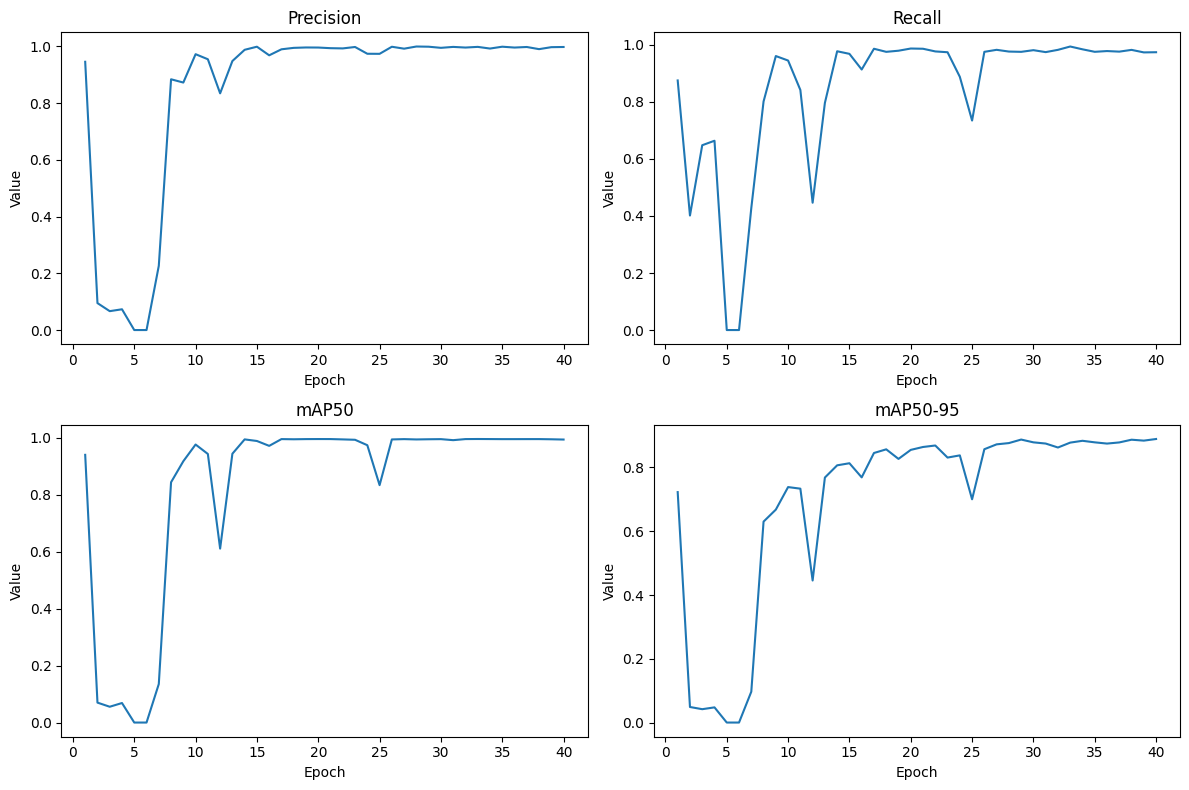

In [48]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=40, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [49]:
metrics = model.val()

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 29.2±13.9 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


                   all         49       1017      0.999      0.974      0.993      0.902
Speed: 3.0ms preprocess, 33.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train92


In [50]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 13 devices, 37.1ms
Speed: 5.4ms preprocess, 37.1ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)


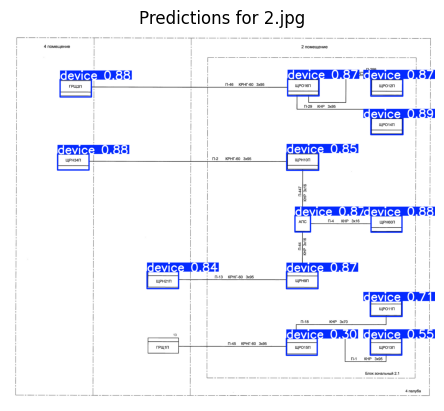


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 480x640 13 devices, 40.9ms
Speed: 5.8ms preprocess, 40.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


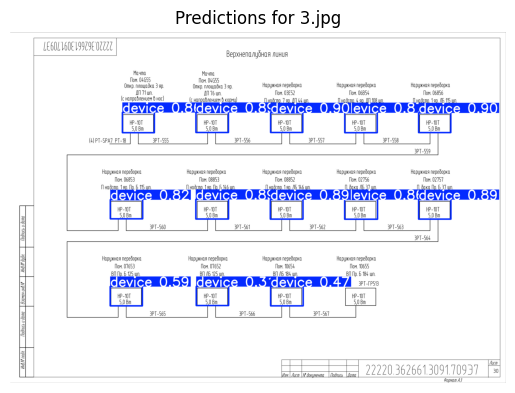

In [51]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [52]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo11m_trained_model.pt')

#Yolo 11 Large

In [53]:
# Load a model
model = YOLO("yolo11l.pt")  # load a pretrained model

100%|██████████| 49.0M/49.0M [00:02<00:00, 25.6MB/s]


Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 3.8±4.6 ms, read: 10.4±8.5 MB/s, size: 57.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train10
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      11.4G      1.921      3.062      1.213        160        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         49       1017      0.947      0.876      0.948      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      10.5G      1.131     0.9183     0.9252        175        640: 100%|██████████| 15/15 [00:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         49       1017      0.203     0.0138     0.0154     0.0062



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      10.6G      1.154     0.8422     0.9186        291        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      10.4G      1.063       0.78     0.9076        263        640: 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      10.5G      1.057     0.7345     0.9021        333        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      10.5G      1.039     0.6951     0.8952        244        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      11.1G      1.065     0.7036      0.899        186        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         49       1017          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      10.5G      1.033     0.6907     0.8927        135        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         49       1017      0.943       0.77      0.834       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      10.8G     0.9982     0.6517     0.8853        220        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         49       1017      0.982      0.962      0.981      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      10.5G     0.9783     0.6422      0.883        290        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         49       1017      0.981      0.927      0.964      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      10.5G     0.9573     0.6461     0.8787        280        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         49       1017      0.906      0.959      0.972      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      10.5G     0.8988     0.5891     0.8723        311        640: 100%|██████████| 15/15 [00:11<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         49       1017      0.974      0.955      0.982      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      10.3G      0.989     0.6153     0.8768        394        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         49       1017      0.986      0.967      0.992      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      10.7G     0.8899     0.5635     0.8635        229        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         49       1017      0.991      0.988      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      10.4G      0.934     0.5864     0.8602        153        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         49       1017      0.997      0.972      0.991      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      10.6G     0.8472     0.5319      0.852        144        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         49       1017      0.992      0.971      0.993      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      10.5G     0.8797     0.5572     0.8612         91        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         49       1017      0.997      0.972      0.988      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      10.6G     0.9009     0.5424     0.8582        324        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         49       1017      0.996      0.976      0.991      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      10.5G     0.8829     0.5314     0.8564        120        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         49       1017      0.997      0.973       0.99      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      10.6G     0.8402     0.5104     0.8473        171        640: 100%|██████████| 15/15 [00:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         49       1017      0.996      0.974      0.994      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      10.6G     0.8303      0.503     0.8503        201        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         49       1017      0.997      0.974      0.992       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      10.7G     0.8255     0.4915     0.8533        205        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         49       1017      0.998      0.975      0.993      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      10.5G      0.771     0.4795     0.8479        148        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         49       1017      0.998      0.972      0.993      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      10.5G      0.825     0.4979     0.8447        306        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         49       1017      0.993      0.974      0.993      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      10.7G     0.7508     0.4693     0.8421        195        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         49       1017      0.986      0.978      0.991      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      10.3G     0.7581     0.4627     0.8385        209        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         49       1017      0.999       0.93      0.962       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      10.4G     0.8085     0.4826     0.8456        117        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         49       1017      0.997      0.972      0.993      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      10.6G     0.7747     0.4835     0.8398        287        640: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         49       1017      0.996       0.98      0.994      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      10.4G      0.779     0.4658     0.8453        149        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         49       1017      0.993      0.988      0.995      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      10.7G     0.7543     0.4394     0.8289        131        640: 100%|██████████| 15/15 [00:11<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         49       1017      0.994      0.986      0.995      0.877


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      10.4G     0.7085     0.4215     0.8253        115        640: 100%|██████████| 15/15 [00:11<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         49       1017      0.999       0.98      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      10.3G      0.748     0.4396     0.8301        100        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         49       1017      0.998       0.98      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      10.3G     0.7296     0.4148     0.8431        123        640: 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         49       1017      0.995      0.991      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      10.4G     0.7068     0.4083     0.8321        142        640: 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         49       1017      0.992      0.991      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      10.2G     0.6979     0.4045     0.8241        146        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         49       1017      0.995      0.982      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      10.3G     0.6908      0.385     0.8261        125        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         49       1017      0.995      0.982      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      10.6G     0.7236     0.4104     0.8283        212        640: 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         49       1017      0.995      0.981      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      10.5G     0.6694     0.3776     0.8158        185        640: 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         49       1017      0.996      0.981      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      10.5G     0.6775     0.3763     0.8128        171        640: 100%|██████████| 15/15 [00:10<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         49       1017      0.986      0.991      0.995      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      10.5G     0.6576     0.3634     0.8209         85        640: 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         49       1017      0.994      0.977      0.995      0.887



40 epochs completed in 0.192 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 51.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]


                   all         49       1017      0.986      0.991      0.995       0.89
Speed: 0.2ms preprocess, 16.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train10
CSV path: runs/detect/train10/results.csv


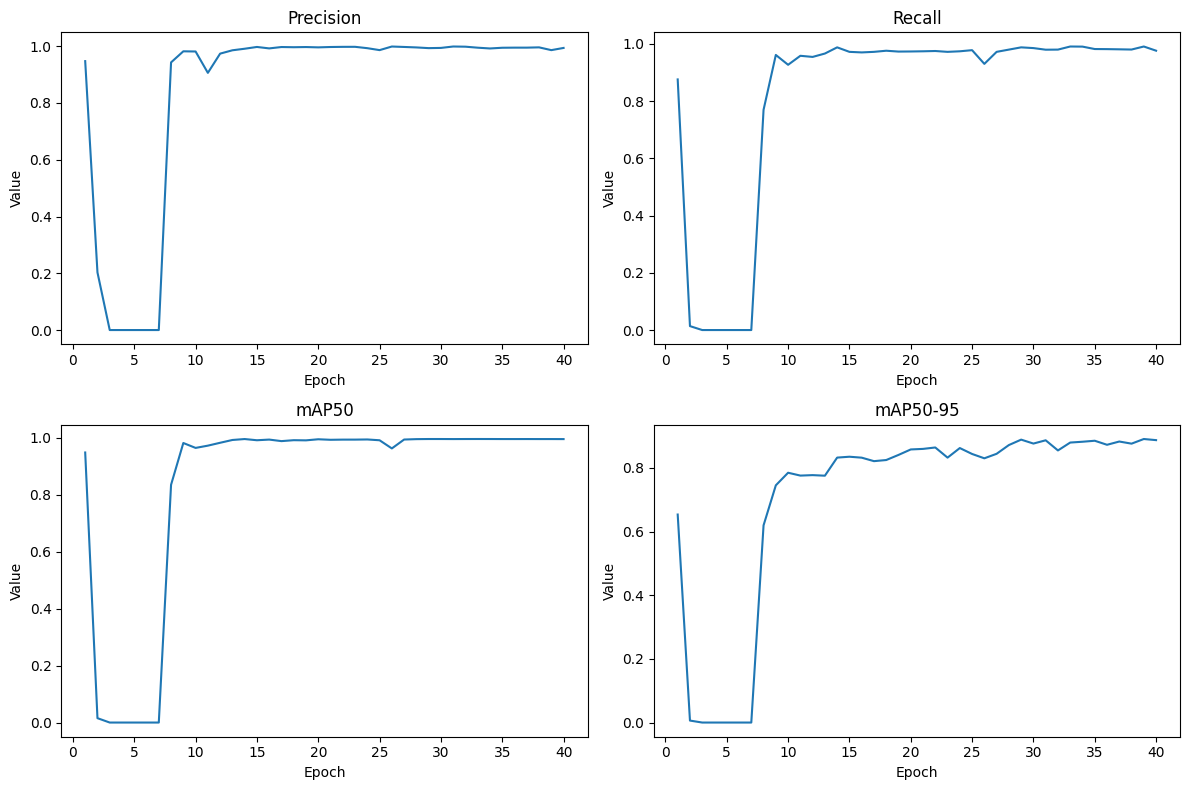

In [54]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=40, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [55]:
metrics = model.val()

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 33.0±6.3 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


                   all         49       1017      0.985       0.99      0.995      0.901
Speed: 10.3ms preprocess, 39.9ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train102


In [56]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 10 devices, 46.9ms
Speed: 5.5ms preprocess, 46.9ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)


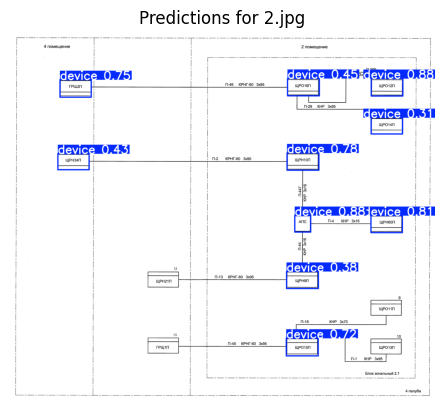


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 480x640 8 devices, 37.2ms
Speed: 4.8ms preprocess, 37.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


In [57]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [58]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo11l_trained_model.pt')

#Yolo 8 nano - 60эпох

In [59]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model

In [60]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=60, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.8±1.0 ms, read: 6.3±3.6 MB/s, size: 57.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train11
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60       4.2G      2.178      3.456      1.288        160        640: 100%|██████████| 15/15 [00:06<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         49       1017      0.042      0.607     0.0441     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      4.23G      1.421      1.445     0.9441        175        640: 100%|██████████| 15/15 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         49       1017     0.0611      0.883      0.553       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      4.25G      1.276      1.152     0.9232        291        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         49       1017     0.0927      0.911      0.636      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      4.26G      1.229      1.012      0.911        263        640: 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1017      0.935      0.478      0.813      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      4.26G      1.239     0.9657     0.9068        333        640: 100%|██████████| 15/15 [00:05<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         49       1017      0.897      0.554      0.803      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      4.26G      1.181     0.9034     0.8866        244        640: 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         49       1017      0.907      0.744      0.899      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      4.26G      1.149      0.872     0.8912        186        640: 100%|██████████| 15/15 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         49       1017      0.904      0.888      0.934      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      4.26G      1.152     0.8567      0.891        135        640: 100%|██████████| 15/15 [00:04<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         49       1017      0.876      0.892      0.933      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      4.26G      1.077     0.7928     0.8774        220        640: 100%|██████████| 15/15 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         49       1017       0.97       0.95      0.977      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      4.26G      1.033     0.7563     0.8688        290        640: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         49       1017      0.983      0.939      0.978      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      4.26G      1.085     0.7795     0.8749        280        640: 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         49       1017      0.983      0.943      0.982      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      4.26G     0.9929     0.7282     0.8652        311        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         49       1017      0.982      0.957      0.981       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      4.26G      1.051     0.7333     0.8643        394        640: 100%|██████████| 15/15 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         49       1017       0.99      0.969      0.986      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      4.26G     0.9806     0.6852     0.8534        229        640: 100%|██████████| 15/15 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         49       1017      0.979      0.967      0.981      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      4.26G      1.023     0.7073     0.8583        153        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         49       1017      0.982      0.961      0.987      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      4.26G     0.9808     0.6687     0.8559        144        640: 100%|██████████| 15/15 [00:05<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49       1017      0.989      0.959      0.984      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      4.26G      1.006     0.7182     0.8574         91        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         49       1017      0.993      0.955      0.983      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      4.26G     0.9931     0.6745     0.8546        324        640: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         49       1017      0.982      0.962      0.984      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      4.26G      1.006     0.6573     0.8549        120        640: 100%|██████████| 15/15 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         49       1017      0.987       0.96      0.983      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      4.26G     0.9868     0.6634     0.8513        171        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         49       1017      0.994      0.962      0.988       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      4.26G     0.9563      0.646     0.8513        201        640: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         49       1017      0.994      0.957      0.985      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      4.26G     0.9522     0.6418     0.8534        205        640: 100%|██████████| 15/15 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017      0.986      0.963      0.984      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      4.26G     0.9167     0.6153     0.8455        148        640: 100%|██████████| 15/15 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         49       1017      0.992      0.967      0.991      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      4.26G     0.9611     0.6239     0.8462        306        640: 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         49       1017      0.984      0.959      0.981      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      4.26G     0.9069     0.6043     0.8478        195        640: 100%|██████████| 15/15 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         49       1017      0.996      0.971      0.992      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      4.26G     0.9307     0.6093     0.8453        209        640: 100%|██████████| 15/15 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         49       1017      0.994      0.979      0.994      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      4.26G       0.93     0.6031     0.8539        117        640: 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         49       1017      0.984      0.976      0.992      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      4.26G     0.9095     0.6016     0.8445        287        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         49       1017      0.987      0.967      0.984      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      4.26G     0.9365      0.605     0.8476        149        640: 100%|██████████| 15/15 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         49       1017      0.969      0.951      0.987      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      4.26G       0.91     0.5821     0.8353        131        640: 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         49       1017      0.996      0.968      0.991      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      4.26G     0.8693     0.5567      0.834        158        640: 100%|██████████| 15/15 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         49       1017      0.995      0.978      0.994      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      4.26G     0.8744     0.5409     0.8297        230        640: 100%|██████████| 15/15 [00:04<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         49       1017      0.991      0.977      0.992       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      4.26G     0.8922     0.5612     0.8353        262        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         49       1017      0.996      0.977      0.993      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      4.26G     0.8593     0.5486     0.8374        192        640: 100%|██████████| 15/15 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49       1017      0.997      0.973      0.993      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      4.26G     0.8964     0.5737     0.8367        423        640: 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         49       1017      0.992      0.976      0.991      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      4.26G      0.851     0.5546     0.8313        247        640: 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         49       1017      0.995      0.972      0.992      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      4.26G      0.886     0.5473     0.8278        312        640: 100%|██████████| 15/15 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         49       1017      0.993      0.974      0.992      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      4.26G     0.8938     0.5504      0.832         96        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         49       1017      0.991      0.977      0.991      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      4.26G     0.8772     0.5588     0.8381        230        640: 100%|██████████| 15/15 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         49       1017      0.991      0.976      0.991      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      4.26G     0.8675     0.5324     0.8329        181        640: 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49       1017      0.993      0.971      0.992      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      4.26G     0.8449     0.5266     0.8249        237        640: 100%|██████████| 15/15 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         49       1017      0.993      0.974      0.992      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      4.26G     0.8126     0.4915     0.8246        229        640: 100%|██████████| 15/15 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         49       1017      0.995      0.971      0.984      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      4.26G     0.8815     0.5312      0.835        254        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         49       1017      0.996      0.976      0.989      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      4.26G     0.8477     0.5188     0.8221        379        640: 100%|██████████| 15/15 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         49       1017      0.995      0.975      0.993      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      4.26G     0.8286     0.5195     0.8222        186        640: 100%|██████████| 15/15 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         49       1017      0.996      0.973      0.993       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      4.26G     0.8243     0.5249      0.827        104        640: 100%|██████████| 15/15 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         49       1017      0.993      0.977      0.992       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      4.26G      0.784     0.5008     0.8208        146        640: 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49       1017      0.996      0.979      0.994       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      4.26G     0.7987     0.5013     0.8237        221        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         49       1017      0.997      0.978      0.994      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      4.26G     0.8206      0.524     0.8242        149        640: 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         49       1017      0.997      0.977      0.994      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      4.26G     0.7946     0.4853     0.8203        226        640: 100%|██████████| 15/15 [00:04<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         49       1017      0.999      0.977      0.994      0.865


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      4.26G     0.7585     0.4689      0.812        164        640: 100%|██████████| 15/15 [00:05<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         49       1017      0.999      0.974      0.992      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      4.26G     0.7435     0.4675     0.8175        156        640: 100%|██████████| 15/15 [00:04<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         49       1017      0.995      0.981      0.992      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      4.26G     0.7586     0.4734     0.8249        140        640: 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         49       1017      0.994      0.982      0.992      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      4.26G     0.7583     0.4643     0.8137        169        640: 100%|██████████| 15/15 [00:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         49       1017      0.995      0.981      0.993      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      4.26G     0.7431      0.452       0.82         71        640: 100%|██████████| 15/15 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         49       1017      0.995       0.98      0.993      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      4.26G     0.7547     0.4457     0.8226        105        640: 100%|██████████| 15/15 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017      0.997      0.981      0.994      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      4.26G     0.7682      0.469     0.8233         82        640: 100%|██████████| 15/15 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         49       1017      0.995      0.977      0.993      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      4.26G     0.7391      0.456     0.8117        215        640: 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         49       1017      0.996      0.981      0.994      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      4.26G     0.7398     0.4521     0.8198        136        640: 100%|██████████| 15/15 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         49       1017      0.995      0.981      0.993      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      4.26G     0.7364     0.4531     0.8191        141        640: 100%|██████████| 15/15 [00:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         49       1017      0.997      0.982      0.993      0.867



60 epochs completed in 0.093 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 6.2MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]


                   all         49       1017      0.999      0.975      0.992      0.869
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train11
CSV path: runs/detect/train11/results.csv


In [61]:
metrics = model.val()

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 27.6±7.0 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


                   all         49       1017      0.999      0.975      0.992      0.876
Speed: 17.3ms preprocess, 6.1ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train112


In [62]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 14 devices, 8.6ms
Speed: 4.2ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)



image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 480x640 13 devices, 9.6ms
Speed: 4.1ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


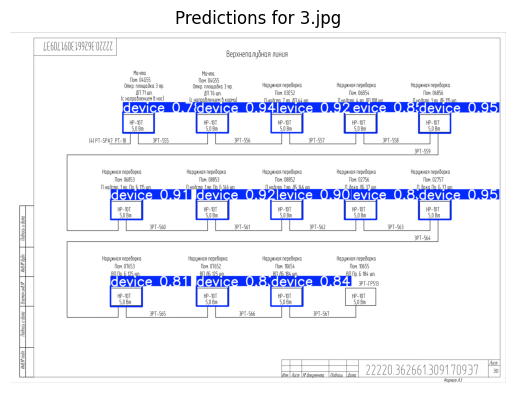

In [63]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [64]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo8n(60ep)_trained_model.pt')

#Yolo 8 nano - 80эпох

In [65]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 1.9±0.8 ms, read: 17.2±12.9 MB/s, size: 57.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train12
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      3.66G      2.178      3.456      1.288        160        640: 100%|██████████| 15/15 [00:05<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49       1017      0.042      0.607     0.0441     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      4.04G       1.42      1.442     0.9439        175        640: 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         49       1017     0.0606      0.876      0.558      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      4.04G      1.276      1.149     0.9236        291        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         49       1017     0.0786      0.897      0.462      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      4.04G      1.218      1.006     0.9072        263        640: 100%|██████████| 15/15 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         49       1017      0.593      0.574      0.528      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      4.04G      1.223     0.9616     0.9072        333        640: 100%|██████████| 15/15 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49       1017      0.892      0.635      0.845      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      4.04G      1.187     0.9156     0.8876        244        640: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         49       1017      0.896      0.856      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      4.46G      1.122     0.8648      0.888        186        640: 100%|██████████| 15/15 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


                   all         49       1017      0.936       0.95      0.972      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      4.46G        1.1     0.8386     0.8864        135        640: 100%|██████████| 15/15 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         49       1017      0.913      0.857      0.932      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      4.46G      1.065     0.7988     0.8776        220        640: 100%|██████████| 15/15 [00:05<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         49       1017      0.953      0.919      0.967      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      4.46G      1.059     0.7716     0.8721        290        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         49       1017      0.964       0.95      0.974      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      4.46G      1.088     0.7868      0.875        280        640: 100%|██████████| 15/15 [00:04<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         49       1017      0.965      0.951      0.973      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      4.46G      1.023     0.7392     0.8707        311        640: 100%|██████████| 15/15 [00:04<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         49       1017      0.976      0.953      0.983      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      4.46G       1.06     0.7429     0.8692        394        640: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         49       1017      0.976      0.947      0.983      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      4.46G     0.9799     0.6857     0.8544        229        640: 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         49       1017      0.992      0.965      0.993      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      4.46G      1.054     0.7339       0.86        153        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         49       1017      0.985       0.96       0.99      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      4.46G     0.9793     0.6648     0.8554        144        640: 100%|██████████| 15/15 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         49       1017      0.993      0.969      0.984      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      4.46G     0.9936     0.6922     0.8529         91        640: 100%|██████████| 15/15 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1017      0.981      0.969      0.991      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      4.46G     0.9911      0.666      0.853        324        640: 100%|██████████| 15/15 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         49       1017      0.993       0.96      0.989       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      4.46G      1.028     0.6748      0.858        120        640: 100%|██████████| 15/15 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         49       1017      0.981       0.97      0.986      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      4.46G     0.9889     0.6649       0.85        171        640: 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         49       1017      0.991      0.963      0.989      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      4.46G     0.9541     0.6443     0.8527        201        640: 100%|██████████| 15/15 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         49       1017      0.983      0.963      0.985      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      4.46G     0.9572     0.6409     0.8525        205        640: 100%|██████████| 15/15 [00:04<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49       1017      0.992      0.962      0.983      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      4.46G     0.9235     0.6231     0.8476        148        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         49       1017      0.992      0.971      0.988      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      4.46G     0.9671     0.6449     0.8503        306        640: 100%|██████████| 15/15 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         49       1017      0.982      0.968      0.983      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      4.46G     0.9123     0.6154      0.851        195        640: 100%|██████████| 15/15 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         49       1017      0.996      0.968      0.985      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      4.46G     0.9403     0.6238     0.8461        209        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         49       1017      0.989      0.966       0.99      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      4.46G     0.9574     0.6297     0.8544        117        640: 100%|██████████| 15/15 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         49       1017      0.992      0.973      0.991      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      4.48G     0.9393     0.6209     0.8464        287        640: 100%|██████████| 15/15 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         49       1017      0.992      0.971      0.988      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      4.48G     0.9676     0.6233       0.85        149        640: 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         49       1017      0.995      0.966      0.988      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      4.49G     0.9156     0.5917     0.8356        131        640: 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         49       1017      0.994      0.975      0.986      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      4.49G     0.8853     0.5684      0.836        158        640: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49       1017      0.997       0.97      0.987      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      4.49G     0.8815     0.5535     0.8301        230        640: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         49       1017      0.993      0.974      0.989      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      4.49G     0.8905     0.5569     0.8349        262        640: 100%|██████████| 15/15 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         49       1017      0.986      0.973      0.992      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      4.49G     0.8658     0.5448     0.8372        192        640: 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         49       1017      0.992      0.972      0.993      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      4.49G     0.8897     0.5694     0.8369        423        640: 100%|██████████| 15/15 [00:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         49       1017      0.995      0.977      0.991      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      4.49G     0.8548     0.5538     0.8296        247        640: 100%|██████████| 15/15 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         49       1017      0.995      0.976      0.992      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      4.49G     0.8797     0.5474     0.8318        312        640: 100%|██████████| 15/15 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         49       1017      0.991      0.975      0.992       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      4.49G     0.9102     0.5602     0.8326         96        640: 100%|██████████| 15/15 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         49       1017      0.995      0.974      0.993      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      4.51G      0.899     0.5679     0.8395        230        640: 100%|██████████| 15/15 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         49       1017      0.995       0.97      0.991      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      4.51G     0.8745     0.5412     0.8323        181        640: 100%|██████████| 15/15 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         49       1017      0.996      0.969       0.99      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      4.53G     0.8459     0.5231     0.8246        237        640: 100%|██████████| 15/15 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         49       1017      0.997      0.967      0.988      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      4.53G     0.8265     0.4968     0.8268        229        640: 100%|██████████| 15/15 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         49       1017      0.995      0.962      0.984      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      4.54G     0.8905     0.5416     0.8369        254        640: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1017      0.991      0.969      0.988      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      4.54G     0.8694      0.531     0.8242        379        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         49       1017      0.997      0.967      0.991      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      4.56G     0.8439     0.5298     0.8245        186        640: 100%|██████████| 15/15 [00:05<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         49       1017      0.996      0.973       0.99       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      4.56G     0.8513     0.5353     0.8291        104        640: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         49       1017      0.998      0.971      0.989      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      4.97G     0.8084     0.5106      0.823        146        640: 100%|██████████| 15/15 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         49       1017      0.993      0.979       0.99      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      4.97G     0.8173      0.515     0.8248        221        640: 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         49       1017      0.992      0.981       0.99      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      4.97G     0.8386     0.5293     0.8258        149        640: 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         49       1017      0.996      0.974      0.989      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      4.97G     0.8104     0.4932     0.8207        226        640: 100%|██████████| 15/15 [00:05<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         49       1017      0.995      0.978      0.991      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      4.97G       0.81      0.496     0.8211        329        640: 100%|██████████| 15/15 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         49       1017      0.994      0.977      0.993      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      4.97G     0.8149      0.494     0.8291        128        640: 100%|██████████| 15/15 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         49       1017      0.996      0.974      0.991      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      4.97G     0.7881     0.4845     0.8201         61        640: 100%|██████████| 15/15 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         49       1017      0.996      0.977      0.992      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      4.97G     0.7857     0.4893     0.8219        218        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         49       1017      0.993      0.979      0.993      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      4.97G     0.7795     0.4773     0.8209        168        640: 100%|██████████| 15/15 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         49       1017      0.994      0.973      0.989      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      4.97G     0.7871     0.4906     0.8197        152        640: 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         49       1017      0.996      0.974      0.992      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      4.97G     0.8345     0.4947     0.8239        308        640: 100%|██████████| 15/15 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         49       1017      0.997      0.978      0.994      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      4.97G     0.8125     0.4892     0.8211        159        640: 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         49       1017      0.997      0.976      0.994      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      4.97G     0.8009     0.4776     0.8231        184        640: 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         49       1017      0.996      0.971      0.992       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      4.97G     0.8278     0.4935     0.8278        128        640: 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017      0.998       0.97      0.993      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      4.97G     0.7807     0.4657     0.8205        229        640: 100%|██████████| 15/15 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49       1017      0.988      0.973      0.992       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      4.97G      0.778     0.4538     0.8191        170        640: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         49       1017      0.995      0.975      0.993      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      4.97G     0.7861     0.4763     0.8182        220        640: 100%|██████████| 15/15 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         49       1017      0.995      0.974       0.99      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      4.97G     0.7854     0.4652     0.8235        202        640: 100%|██████████| 15/15 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         49       1017      0.996      0.976      0.991      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      4.97G     0.7867     0.4621     0.8127        123        640: 100%|██████████| 15/15 [00:04<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         49       1017      0.996      0.975      0.991      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      4.97G     0.7956     0.4585     0.8165        243        640: 100%|██████████| 15/15 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         49       1017      0.993      0.978      0.993      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      4.97G     0.8213     0.4779     0.8213        271        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         49       1017      0.996      0.975      0.993       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      4.97G     0.7955     0.4777     0.8211        174        640: 100%|██████████| 15/15 [00:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         49       1017      0.995      0.978      0.993      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      4.97G     0.7489     0.4514     0.8102        253        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         49       1017      0.994      0.978      0.993      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      4.97G     0.7763      0.454     0.8179        221        640: 100%|██████████| 15/15 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         49       1017       0.99      0.982      0.993      0.872


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      4.97G     0.7188     0.4357     0.8112        108        640: 100%|██████████| 15/15 [00:05<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         49       1017      0.993      0.982      0.993      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      4.97G     0.7499     0.4452     0.8139        198        640: 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         49       1017      0.997      0.975      0.993      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      4.97G     0.7108     0.4249     0.8069        184        640: 100%|██████████| 15/15 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         49       1017      0.994      0.976      0.992      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      4.97G      0.715      0.432     0.8093        229        640: 100%|██████████| 15/15 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         49       1017      0.993      0.976      0.993      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      4.97G     0.7237     0.4239     0.8108        140        640: 100%|██████████| 15/15 [00:05<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         49       1017      0.999      0.974      0.992      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      4.97G     0.7109      0.429      0.817        170        640: 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49       1017      0.999      0.974      0.992      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      4.97G     0.7443     0.4393     0.8222        150        640: 100%|██████████| 15/15 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         49       1017      0.999      0.973      0.992      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      4.97G     0.7126     0.4272     0.8081         73        640: 100%|██████████| 15/15 [00:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         49       1017      0.995      0.973      0.991       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      4.97G     0.7088     0.4197      0.816        164        640: 100%|██████████| 15/15 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         49       1017      0.998      0.973      0.992       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      4.98G      0.684     0.4063     0.8065        136        640: 100%|██████████| 15/15 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         49       1017      0.998      0.974      0.992       0.87



80 epochs completed in 0.124 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 6.3MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]


                   all         49       1017      0.997      0.975      0.993      0.876
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train12
CSV path: runs/detect/train12/results.csv


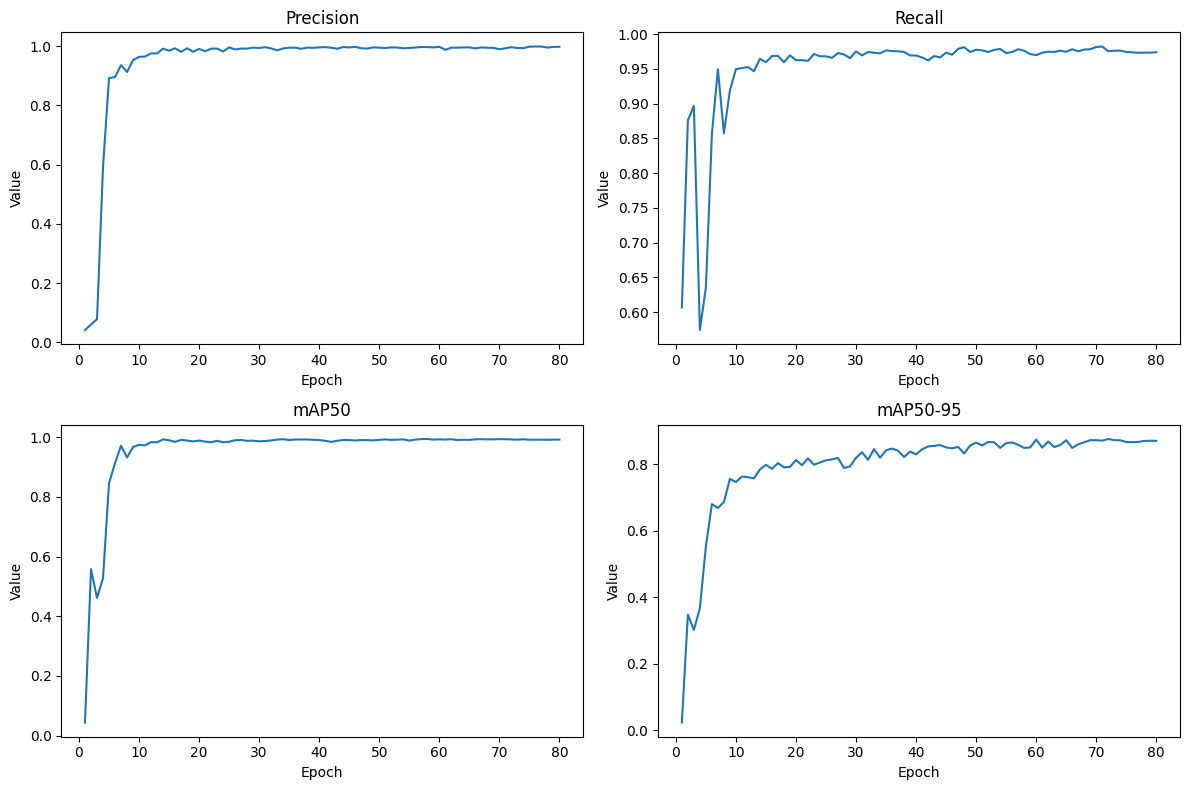

In [66]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=80, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [67]:
metrics = model.val()

Ultralytics 8.3.110 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 27.0±4.4 MB/s, size: 56.3 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


                   all         49       1017      0.997      0.975      0.993      0.884
Speed: 11.2ms preprocess, 6.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train122


In [68]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 14 devices, 12.2ms
Speed: 4.9ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)



image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 480x640 13 devices, 9.7ms
Speed: 3.7ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


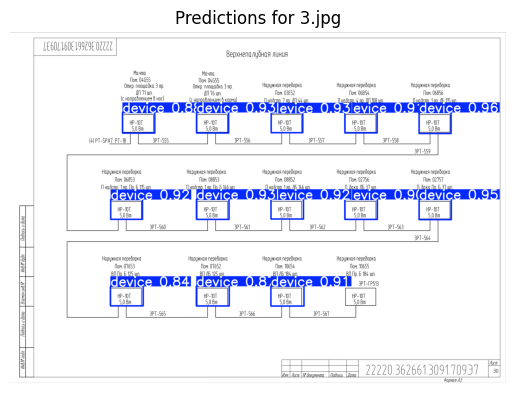

In [69]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [70]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo8n(80ep)_trained_model.pt')

#Yolo 8 nano - 20 batch

In [ ]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=40, time=None, patience=100, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      4.41G      2.366      3.796      1.355        318        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         49       1017     0.0115      0.166    0.00711    0.00275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      5.54G      1.533      1.894     0.9815        258        640: 100%|██████████| 12/12 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         49       1017     0.0571      0.825      0.422      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      5.55G      1.347      1.207      0.937        400        640: 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         49       1017     0.0645      0.932      0.597      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      6.06G      1.229      1.076     0.9202        434        640: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         49       1017      0.065       0.94      0.198      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      6.06G      1.216     0.9802     0.8978        310        640: 100%|██████████| 12/12 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         49       1017      0.429      0.591      0.393      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      6.06G      1.144     0.8867     0.8933        325        640: 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         49       1017      0.998      0.484      0.898      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      6.06G      1.122     0.8422     0.8782        506        640: 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         49       1017       0.98      0.928      0.973       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      6.06G      1.119     0.8291     0.8756        396        640: 100%|██████████| 12/12 [00:04<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         49       1017      0.951      0.842      0.957      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      6.06G      1.112     0.8309     0.8834        425        640: 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         49       1017      0.942      0.897      0.955      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      6.06G      1.089     0.8005     0.8678        258        640: 100%|██████████| 12/12 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all         49       1017      0.962      0.939      0.974      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      6.06G      1.117     0.7782     0.8742        384        640: 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         49       1017      0.972      0.941      0.977      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      6.06G      1.044     0.7652     0.8685        333        640: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         49       1017      0.968      0.954      0.983      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      6.06G      1.047      0.736     0.8572        348        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         49       1017      0.983      0.956      0.987      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      6.06G      1.045     0.7189     0.8538        198        640: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         49       1017      0.984      0.954      0.985      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      6.06G      1.059     0.7363     0.8609        244        640: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         49       1017      0.989      0.962      0.983      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      7.21G      1.073       0.72     0.8605        439        640: 100%|██████████| 12/12 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         49       1017      0.993      0.968      0.991      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      7.21G     0.9823     0.6606     0.8457        235        640: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         49       1017      0.989      0.968      0.989      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      7.21G     0.9572     0.6437     0.8463        272        640: 100%|██████████| 12/12 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         49       1017      0.974      0.964      0.989      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      7.21G     0.9345     0.6428     0.8475        315        640: 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         49       1017       0.99      0.968      0.991      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      7.21G     0.9675     0.6548     0.8505        360        640: 100%|██████████| 12/12 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]


                   all         49       1017      0.983      0.973       0.99      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      7.21G     0.9342     0.6422      0.843        593        640: 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         49       1017      0.992      0.972      0.992      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      7.21G     0.8926     0.6045     0.8393        337        640: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         49       1017      0.991      0.959      0.991       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      7.21G     0.8858     0.5918     0.8399        376        640: 100%|██████████| 12/12 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         49       1017      0.985      0.974      0.992      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      7.22G     0.8827      0.606      0.837        310        640: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         49       1017      0.992      0.972      0.993      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      7.22G     0.8914     0.6097     0.8362        292        640: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         49       1017      0.988      0.971      0.993      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      7.24G     0.8913     0.5857     0.8417        262        640: 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         49       1017      0.999      0.963      0.992      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      7.24G     0.8838     0.5729      0.835        285        640: 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49       1017      0.993      0.973      0.991      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      7.26G     0.8433     0.5541     0.8264        359        640: 100%|██████████| 12/12 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         49       1017      0.994      0.969      0.992      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      7.26G     0.8425     0.5661     0.8298        413        640: 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         49       1017      0.988      0.975      0.992      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      8.25G     0.9042     0.5906     0.8343        463        640: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         49       1017      0.986      0.976      0.993      0.812


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      8.25G     0.8381     0.5623      0.833        243        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         49       1017      0.976      0.963      0.983      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      8.27G     0.8718     0.5696     0.8338        181        640: 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         49       1017      0.982      0.964      0.984       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      8.27G      0.811     0.5318     0.8273        200        640: 100%|██████████| 12/12 [00:04<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         49       1017      0.988      0.974      0.993      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      8.28G     0.8126     0.5277     0.8228        260        640: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


                   all         49       1017      0.976      0.975      0.985      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      8.28G     0.7938     0.5224     0.8239        246        640: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]


                   all         49       1017      0.978      0.975      0.984      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      8.28G      0.784      0.509     0.8256        246        640: 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         49       1017      0.983      0.977      0.993      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      8.28G     0.7633     0.5077     0.8233        296        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         49       1017      0.981      0.976      0.992      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      8.28G     0.7898     0.5017     0.8234        276        640: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         49       1017      0.988      0.974      0.992       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      8.28G      0.756     0.4998     0.8221        238        640: 100%|██████████| 12/12 [00:03<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         49       1017      0.985      0.974      0.992      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      8.28G      0.767     0.4965     0.8202        283        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         49       1017      0.987      0.971      0.992       0.85



40 epochs completed in 0.065 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]


                   all         49       1017      0.986      0.976      0.992      0.855
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train4
CSV path: runs/detect/train4/results.csv


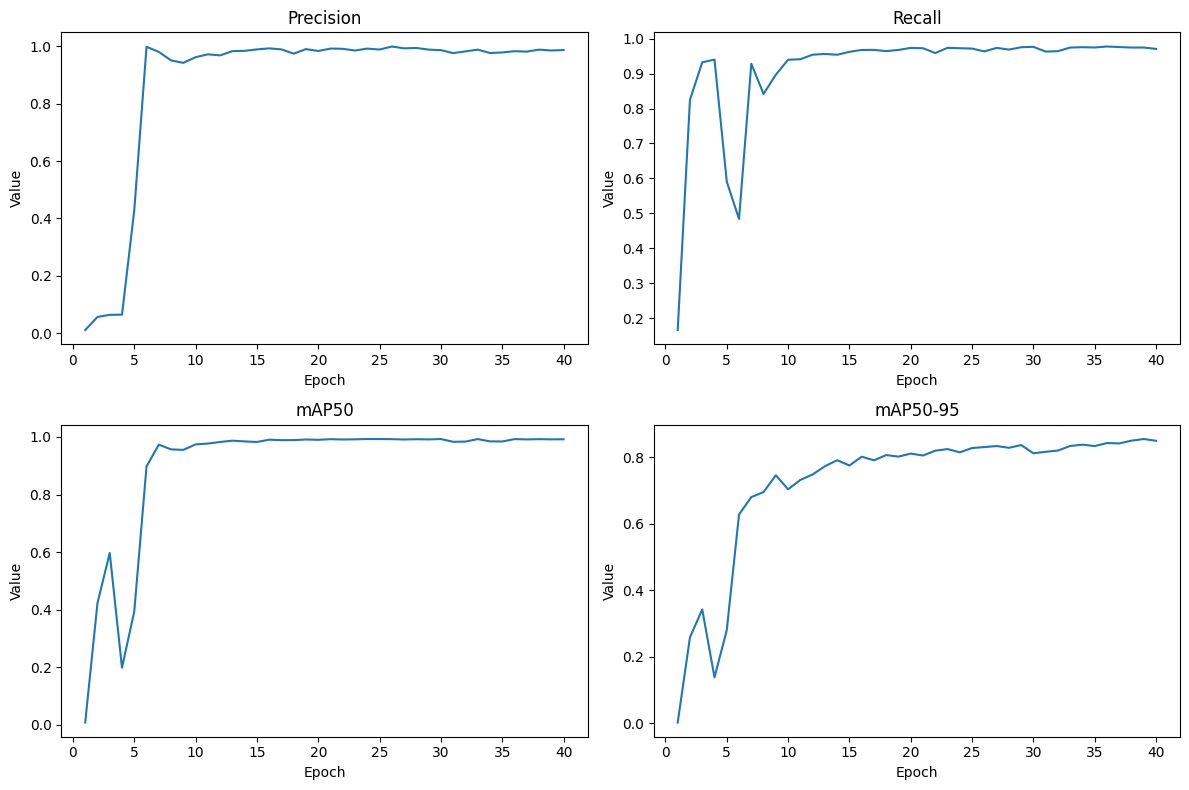

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=40, imgsz=640, batch=20, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
metrics = model.val()

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]


                   all         49       1017      0.987      0.975      0.992      0.863
Speed: 0.3ms preprocess, 17.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train42


In [ ]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 640x640 (no detections), 8.3ms
Speed: 3.8ms preprocess, 8.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


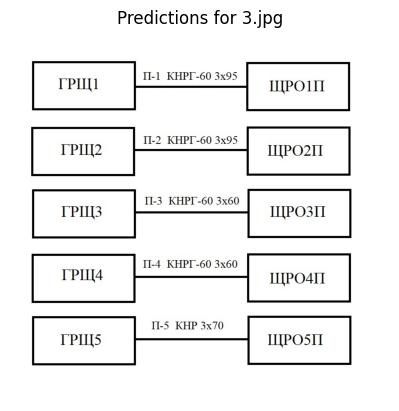


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 14 devices, 13.2ms
Speed: 4.8ms preprocess, 13.2ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)


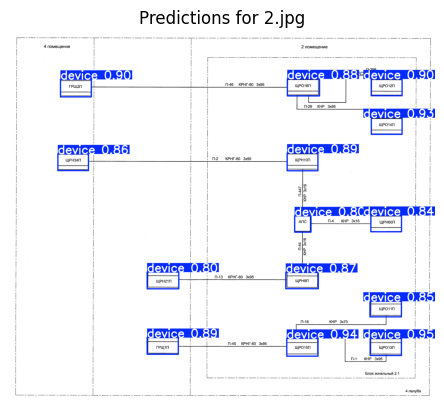

In [ ]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo8n(20batch)_trained_model.pt')

#Yolo 8 nano - 32 batch

In [ ]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=40, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      10.8G      2.502      3.847      1.406        232        640: 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         49       1017    0.00102     0.0147   0.000518   0.000182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      14.5G      1.709      3.051      1.087        163        640: 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         49       1017     0.0456      0.659     0.0573     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      7.36G      1.433      1.453     0.9479        181        640: 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         49       1017     0.0564      0.815      0.455      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      8.48G      1.268      1.131      0.925        129        640: 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         49       1017     0.0627      0.907       0.51       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40         9G      1.316      1.057      0.921         87        640: 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all         49       1017      0.063      0.911      0.515      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      10.1G      1.226     0.9376     0.8951        211        640: 100%|██████████| 8/8 [00:03<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         49       1017     0.0663      0.958      0.441      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      10.1G      1.171      0.887     0.8882        239        640: 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         49       1017     0.0728      0.976      0.717      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      10.1G      1.158     0.8689     0.8838        173        640: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         49       1017       0.96      0.707      0.932      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      10.1G       1.04        0.8     0.8785        170        640: 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         49       1017       0.99      0.301      0.948      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      11.4G       1.07     0.7839     0.8753        185        640: 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         49       1017      0.997      0.647      0.971      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      11.4G      1.054     0.7628      0.872        238        640: 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         49       1017      0.988      0.851      0.969      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      12.2G      1.073     0.7672     0.8673        163        640: 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         49       1017       0.98      0.939      0.973      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      12.8G      1.159      0.781     0.8681        372        640: 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         49       1017      0.931      0.936      0.962      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      13.4G      1.043     0.7363     0.8656        222        640: 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         49       1017      0.952      0.941       0.97      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      7.02G     0.9699     0.6876     0.8529        124        640: 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         49       1017      0.912      0.912      0.946      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      8.17G      0.981     0.6826     0.8574        223        640: 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         49       1017      0.922       0.93      0.957      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      9.93G       1.05     0.7026     0.8621        160        640: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         49       1017      0.958      0.945      0.974      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      12.4G      1.081     0.7066     0.8575        145        640: 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         49       1017      0.943      0.937      0.971      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      12.9G     0.9541     0.6704     0.8493        182        640: 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all         49       1017      0.988      0.957      0.984      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      13.6G     0.9423     0.6403     0.8424        204        640: 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         49       1017      0.984      0.961      0.991      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      6.88G     0.9961     0.6723     0.8561        174        640: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         49       1017      0.981      0.958      0.986      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40       8.6G     0.9685     0.6403     0.8464        396        640: 100%|██████████| 8/8 [00:03<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         49       1017      0.981      0.966      0.983      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40       8.6G     0.9068     0.6284     0.8381         93        640: 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         49       1017      0.973      0.953       0.98      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      9.78G     0.9426     0.6269     0.8438        206        640: 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         49       1017      0.985       0.95       0.98       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40        11G     0.9181     0.6044     0.8425        149        640: 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         49       1017      0.992      0.957      0.989      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40        11G     0.8935     0.5887     0.8422        165        640: 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         49       1017      0.984      0.969      0.983      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40        11G     0.8842     0.5899     0.8311        236        640: 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         49       1017       0.99      0.969      0.984      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      11.5G     0.8703     0.5754     0.8407        166        640: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         49       1017      0.992      0.966      0.992      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      12.1G     0.9131     0.5834     0.8394        251        640: 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         49       1017      0.996       0.97      0.992      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      12.9G     0.8728     0.5731     0.8365        152        640: 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         49       1017      0.994      0.968      0.991      0.767


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      12.9G     0.8944     0.5946     0.8407        119        640: 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         49       1017       0.99      0.968      0.992      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40        13G     0.8804     0.5829     0.8304        108        640: 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         49       1017      0.989      0.966      0.992      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40        13G     0.8207     0.5303     0.8278        136        640: 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         49       1017      0.989      0.971      0.993      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40        13G     0.8201     0.5306     0.8255        145        640: 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         49       1017      0.985      0.975      0.992      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40        13G     0.8727     0.5735     0.8605        146        640: 100%|██████████| 8/8 [00:03<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         49       1017      0.993      0.969      0.993       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40        13G     0.7987     0.5145     0.8271        116        640: 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         49       1017      0.991       0.97      0.993      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      13.6G     0.7816     0.5218     0.8241        208        640: 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         49       1017      0.992       0.97      0.993      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      5.66G     0.7833     0.5025     0.8222        185        640: 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

                   all         49       1017      0.992       0.97      0.991       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      6.11G     0.7496     0.4879     0.8187        172        640: 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         49       1017      0.993      0.971      0.991      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      6.11G     0.7625     0.4993     0.8172         86        640: 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         49       1017      0.992      0.969      0.991      0.847



40 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


                   all         49       1017      0.992      0.971      0.991      0.847
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train5
CSV path: runs/detect/train5/results.csv


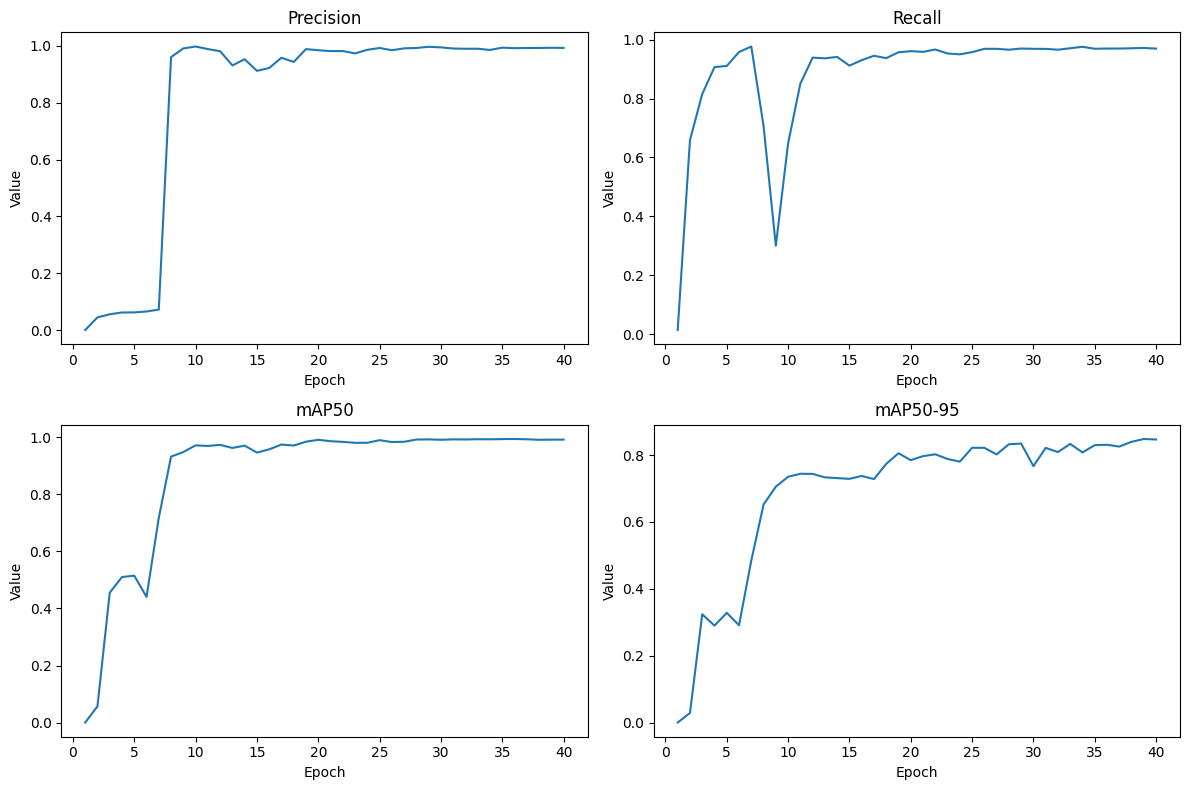

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=40, imgsz=640, batch=32, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
metrics = model.val()

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]


                   all         49       1017      0.993      0.972      0.992      0.854
Speed: 0.2ms preprocess, 13.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train52


In [ ]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 640x640 (no detections), 8.5ms
Speed: 4.0ms preprocess, 8.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


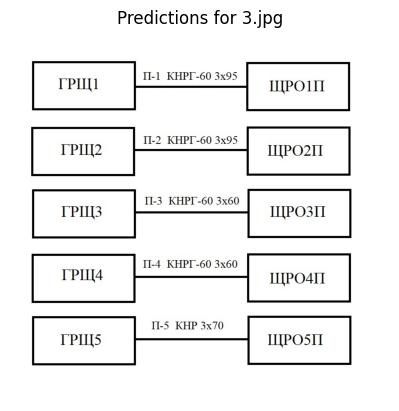


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 14 devices, 10.2ms
Speed: 3.9ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)


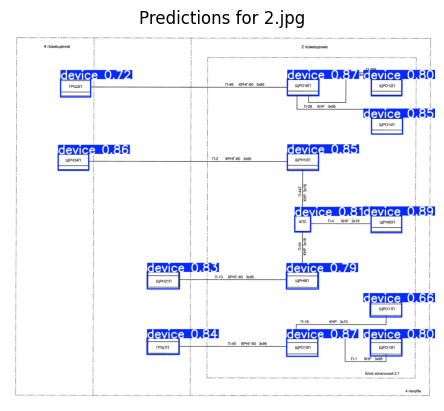

In [ ]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo8n(32batch)_trained_model.pt')

# Yolo 8 nano - 20эпох

In [ ]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd

results = model.train(data=data_yaml, epochs=20, imgsz=640, batch=16, plots=True) # plots=True is important

# Get the path to the training results directory
train_dir = results.save_dir #This is the path to the directory

# Construct the path to the CSV file
csv_path = os.path.join(train_dir, "results.csv")
print(f"CSV path: {csv_path}")

# Read the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(csv_path)

    # Extract the metrics
    epochs = df['epoch'].values  # Use .values to get NumPy arrays
    precision = df['metrics/precision(B)'].values
    recall = df['metrics/recall(B)'].values
    map50 = df['metrics/mAP50(B)'].values
    map50_95 = df['metrics/mAP50-95(B)'].values

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Plot Precision
    axs[0, 0].plot(epochs, precision)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Value')

    # Plot Recall
    axs[0, 1].plot(epochs, recall)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Value')

    # Plot mAP50
    axs[1, 0].plot(epochs, map50)
    axs[1, 0].set_title('mAP50')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Value')

    # Plot mAP50-95
    axs[1, 1].plot(epochs, map50_95)
    axs[1, 1].set_title('mAP50-95')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Value')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: results.csv not found at {csv_path}.  Ensure plots=True during training.")
except KeyError as e:
    print(f"Error:  Key not found in CSV.  Check column names. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab Notebooks/deppllom/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/train/labels.cache... 230 images, 1 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.56G      2.178      3.456      1.288        160        640: 100%|██████████| 15/15 [00:08<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all         49       1017      0.042      0.607     0.0441     0.0225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.96G      1.422      1.451     0.9449        175        640: 100%|██████████| 15/15 [00:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         49       1017     0.0606      0.876      0.527      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.96G      1.273      1.154     0.9221        291        640: 100%|██████████| 15/15 [00:04<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         49       1017      0.101       0.92      0.772      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.96G        1.2      1.008     0.9053        263        640: 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         49       1017      0.971      0.457      0.859      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.96G       1.19     0.9557     0.9048        333        640: 100%|██████████| 15/15 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         49       1017      0.941      0.595      0.886      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.96G      1.146        0.9     0.8833        244        640: 100%|██████████| 15/15 [00:05<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         49       1017      0.928      0.784       0.92      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.38G      1.137     0.8678     0.8871        186        640: 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         49       1017      0.936      0.937      0.967      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.38G      1.079     0.8258     0.8808        135        640: 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         49       1017      0.959      0.925      0.969      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.38G       1.05      0.766     0.8722        220        640: 100%|██████████| 15/15 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         49       1017      0.975      0.929      0.977      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.38G      1.031     0.7533     0.8676        290        640: 100%|██████████| 15/15 [00:04<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         49       1017      0.974      0.942      0.975      0.754


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.38G      1.001      0.752       0.86        167        640: 100%|██████████| 15/15 [00:09<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         49       1017      0.979      0.962      0.983      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.38G      1.001     0.7226     0.8502        134        640: 100%|██████████| 15/15 [00:06<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         49       1017      0.983      0.967      0.987      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.38G      0.935     0.6827     0.8516        118        640: 100%|██████████| 15/15 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         49       1017      0.984      0.963      0.984      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.38G     0.9684     0.7108     0.8604        105        640: 100%|██████████| 15/15 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         49       1017       0.98      0.964      0.983      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.38G      0.936     0.6782     0.8512        149        640: 100%|██████████| 15/15 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         49       1017      0.983       0.97      0.985      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.38G     0.8655     0.6174     0.8416        151        640: 100%|██████████| 15/15 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         49       1017      0.988      0.973      0.992      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.38G     0.8767     0.6211      0.837        200        640: 100%|██████████| 15/15 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         49       1017      0.986      0.976      0.991      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.38G      0.851     0.6017     0.8332        230        640: 100%|██████████| 15/15 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all         49       1017      0.988      0.976       0.99      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.38G     0.8401     0.5937     0.8314        158        640: 100%|██████████| 15/15 [00:05<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         49       1017      0.989      0.976       0.99      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.38G      0.838     0.6032     0.8292        141        640: 100%|██████████| 15/15 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         49       1017      0.985      0.974      0.985      0.822



20 epochs completed in 0.040 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


                   all         49       1017      0.989      0.976       0.99      0.822
Speed: 0.5ms preprocess, 2.5ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train6
CSV path: runs/detect/train6/results.csv


In [ ]:
metrics = model.val()

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/deppllom/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


                   all         49       1017      0.988      0.976       0.99      0.828
Speed: 10.0ms preprocess, 4.8ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train62


In [ ]:
import os
import random

test_img = '/content/drive/MyDrive/Colab Notebooks/deppllom/dtest'
all_images = [f for f in os.listdir(test_img) if f.endswith(('.png', '.jpg', '.jpeg'))]
random_images = random.sample(all_images, 2)


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/3.jpg: 640x640 (no detections), 7.8ms
Speed: 5.0ms preprocess, 7.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


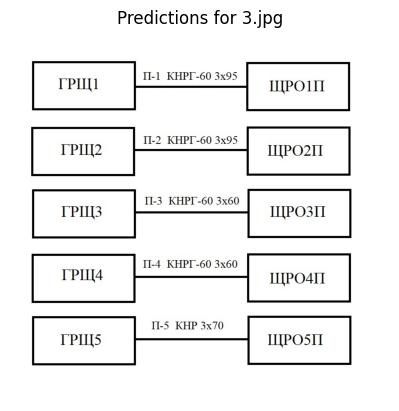


image 1/1 /content/drive/MyDrive/Colab Notebooks/deppllom/dtest/2.jpg: 576x640 13 devices, 9.8ms
Speed: 3.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


In [ ]:
import cv2
import matplotlib.pyplot as plt
for img in random_images:
    img_path = os.path.join(test_img, img)
    results = model.predict(source=img_path, imgsz=640)
    for result in results:

        img_with_boxes = result.plot()
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Predictions for {img}')
        plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/deppllom/yoloOB/yolo8n(20ep)_trained_model.pt')